# ML Exercise 1 - Taiwanese Bankrupcy

### Experiment design

1. Exploration:
    - Target Distribution
    - Missing Values distribution
    - Outliers
2. Preprocessing:
    - Split Train/Test (70-30)
    - Clean missing values
    - Remove outliers
    - Scaling
    - Encoding
    - PCA
3. Models:
    - KNN
    - RF
    - MLP
4. Hyperparameter optimization (Randomized Search CV)
    - Performance comparison
    - Holdout
    - Cross-validation
5. Metrics:
    - Accuracy
    - Precision
    - Recall
    - F1-Score
    - Runtime comparison

In [51]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import warnings
import time
from sklearn.model_selection import StratifiedShuffleSplit

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1. Exploratory Data Analysis

In [4]:
df = pd.read_csv("data/data.csv")

In [5]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest   ROA(A) before interest and % after tax   ROA(B) before interest and depreciation after tax   Operating Gross Margin   Realized Sales Gross Margin   Operating Profit Rate   Pre-tax net Interest Rate   After-tax net Interest Rate   Non-industry income and expenditure/revenue   Continuous interest rate (after tax)   Operating Expense Rate   Research and development expense rate   Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)   Net Value Per Share (B)   Net Value Per Share (A)   Net Value Per Share (C)   Persistent EPS in the Last Four Seasons   Cash Flow Per Share   Revenue Per Share (Yuan ¥)   Operating Profit Per Share (Yuan ¥)   Per Share Net profit before tax (Yuan ¥)   Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate   After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate   Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
0          1                                           0.370594                                        0.424389                                           0.405750                  0.601457                      0.601457                0.998969                    0.796887                      0.808809                                      0.302646                               0.780985             1.256969e-04                                     0.0         0.458143                              0.000725            0.0                  0.147950                  0.147950                  0.147950                                  0.169141              0.311664                     0.017560                              0.095921                                   0.138736                                  0.022102                       0.848195                           0.688979                         0.688979                            0.217535              4.980000e+09   
1          1                                           0.464291                                        0.538214                                           0.516730                  0.610235                      0.610235                0.998946                    0.797380                      0.809301                                      0.303556                               0.781506             2.897851e-04                                     0.0         0.461867                              0.000647            0.0                  0.182251                  0.182251                  0.182251                                  0.208944              0.318137                     0.021144                              0.093722                                   0.169918                                  0.022080                       0.848088                           0.689693                         0.689702                            0.217620              6.110000e+09   
2          1                                           0.426071                                        0.499019                                           0.472295                  0.601450                      0.601364                0.998857                    0.796403                      0.808388                                      0.302035                               0.780284             2.361297e-04                              25500000.0         0.458521                              0.000790            0.0                  0.177911                  0.177911                  0.193713                                  0.180581              0.307102                     0.005944                              0.092338                                   0.142803                                  0.022760                       0.848094                           0.689463                         0.689470                            0.217601              7.280000e+09   
3          1                                           0.399844                        

In [6]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [7]:
df.shape

(6819, 96)

### 1.1. Target distribution  
In the entire data set we have a target distribution of:  
0 - 6599  
1 - 220  

Which means the data set is highly imbalanced, and we will have to evaluate model results properly with multiple metrics.

### 1.2. Missing values  
We have no missing values in this data set.

In [8]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [9]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest   ROA(A) before interest and % after tax   ROA(B) before interest and depreciation after tax   Operating Gross Margin   Realized Sales Gross Margin   Operating Profit Rate   Pre-tax net Interest Rate   After-tax net Interest Rate   Non-industry income and expenditure/revenue   Continuous interest rate (after tax)   Operating Expense Rate   Research and development expense rate   Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)   Net Value Per Share (B)   Net Value Per Share (A)   Net Value Per Share (C)   Persistent EPS in the Last Four Seasons   Cash Flow Per Share   Revenue Per Share (Yuan ¥)   Operating Profit Per Share (Yuan ¥)   Per Share Net profit before tax (Yuan ¥)   Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate   After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate   Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
count  6819.000000                                        6819.000000                                     6819.000000                                        6819.000000               6819.000000                   6819.000000             6819.000000                 6819.000000                   6819.000000                                   6819.000000                            6819.000000             6.819000e+03                            6.819000e+03      6819.000000                          6.819000e+03    6819.000000               6819.000000               6819.000000               6819.000000                               6819.000000           6819.000000                 6.819000e+03                           6819.000000                                6819.000000                               6819.000000                    6819.000000                        6819.000000                      6819.000000                         6819.000000              6.819000e+03   
mean      0.032263                                           0.505180                                        0.558625                                           0.553589                  0.607948                      0.607929                0.998755                    0.797190                      0.809084                                      0.303623                               0.781381             1.995347e+09                            1.950427e+09         0.467431                          1.644801e+07       0.115001                  0.190661                  0.190633                  0.190672                                  0.228813              0.323482                 1.328641e+06                              0.109091                                   0.184361                                  0.022408                       0.847980                           0.689146                         0.689150                            0.217639              5.508097e+09   
std       0.176710                                           0.060686                                        0.065620                                           0.061595                  0.016934                      0.016916                0.013010                    0.012869                      0.013601                                      0.011163                               0.012679             3.237684e+09                            2.598292e+09         0.017036                          1.082750e+08       0.138667                  0.033390                  0.033474                  0.033480                                  0.033263              0.017611                 5.170709e+07                              0.027942                                   0.033180                                  0.012079                       0.010752                           0.013853                         0.013910                            0.010063              2.897718e+09   
min       0.000000                                           0.000000

<AxesSubplot:>

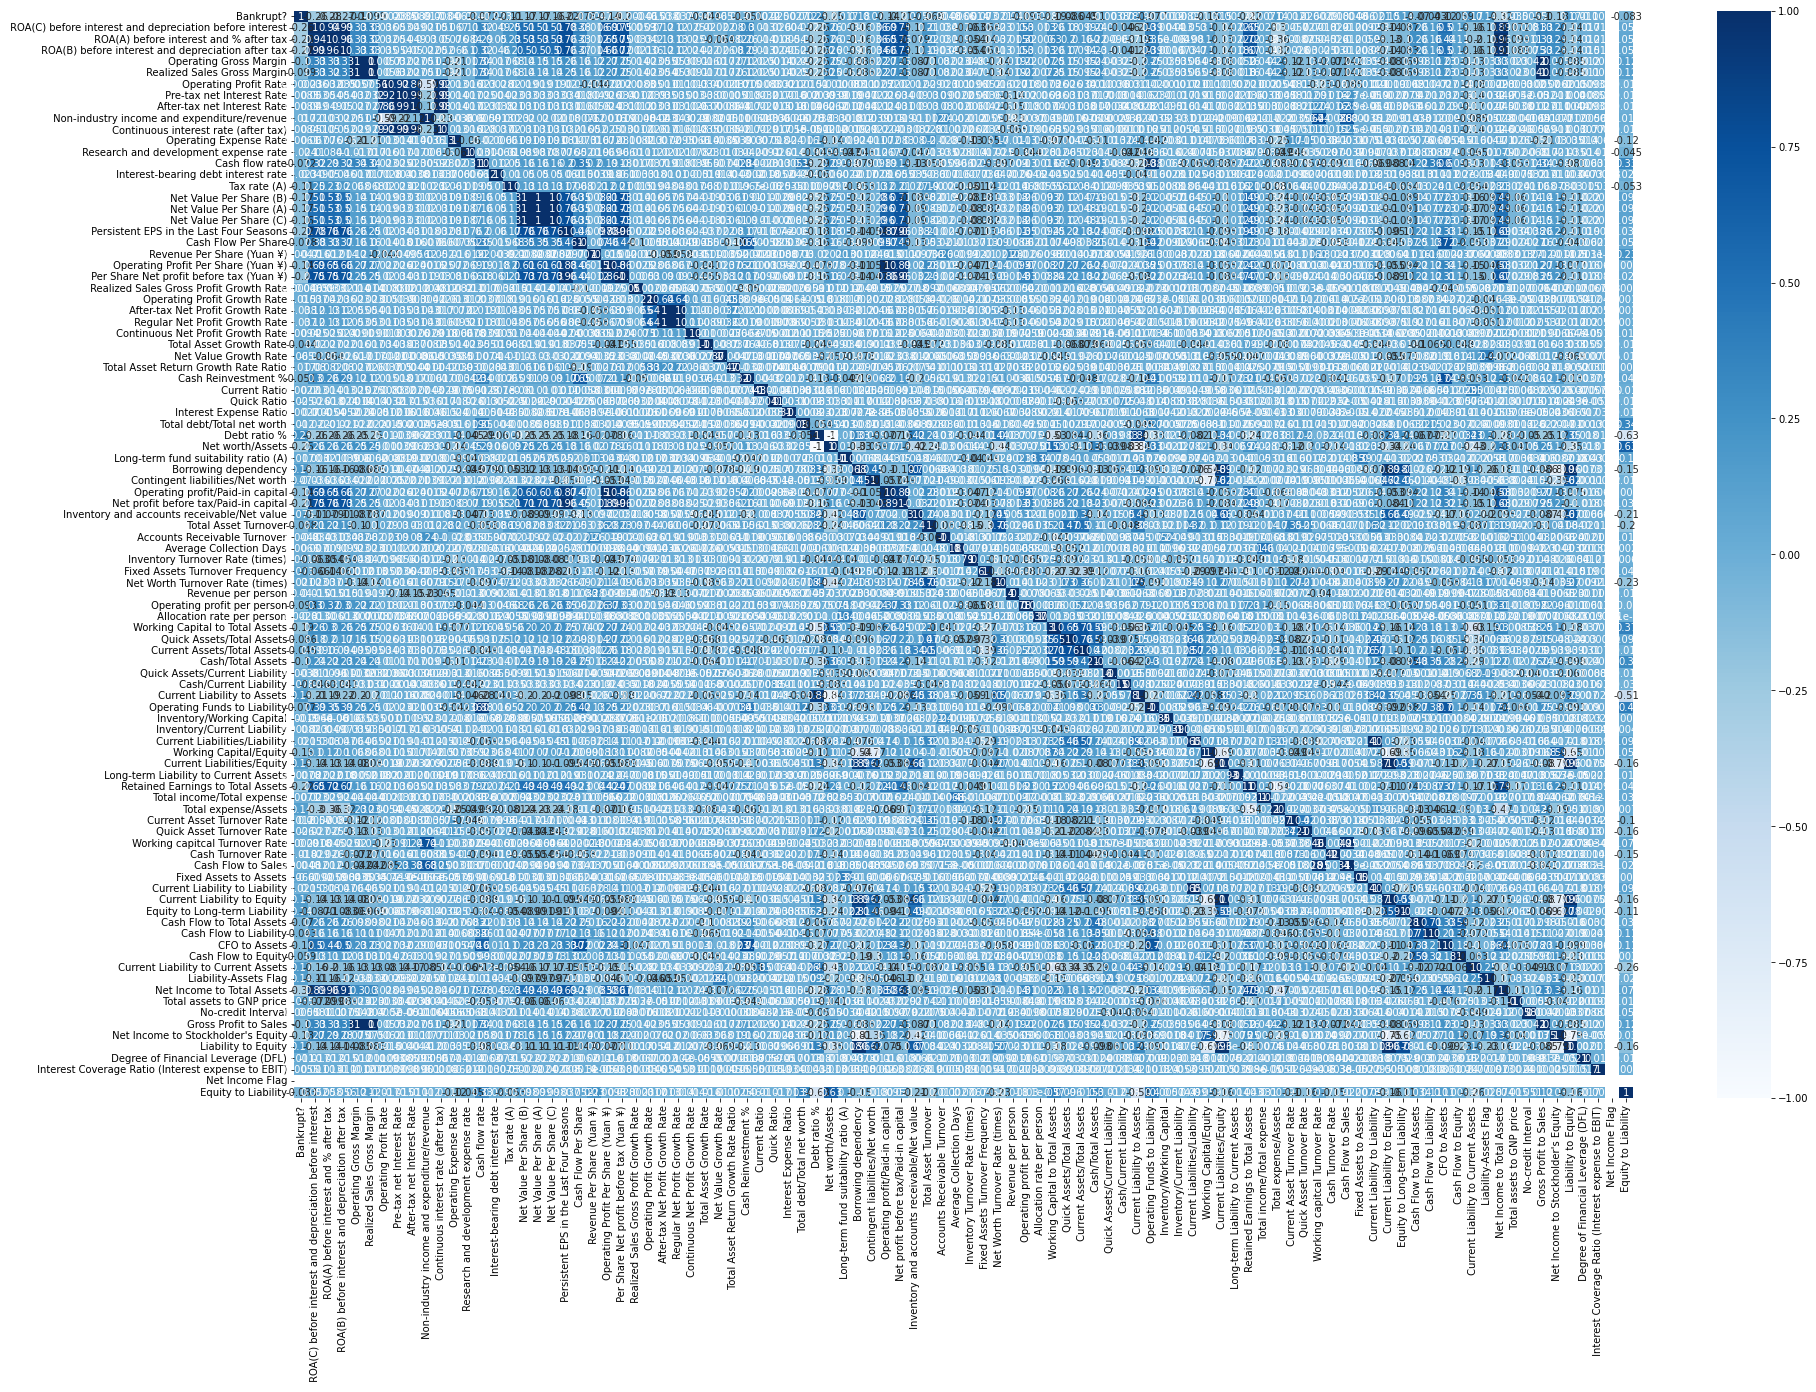

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [12]:
# remove leading and trailing whitespace in column names
df = df.rename(columns=lambda x: x.strip())

### Distribution of independent variables

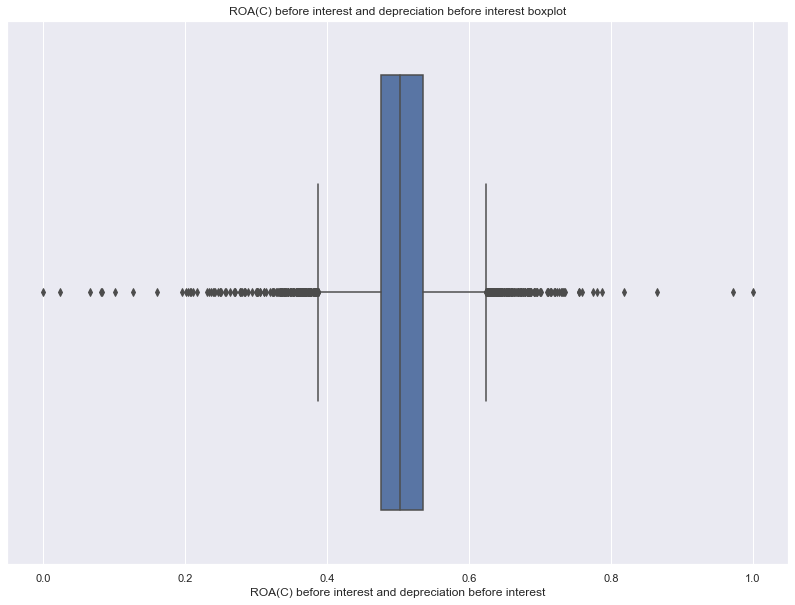

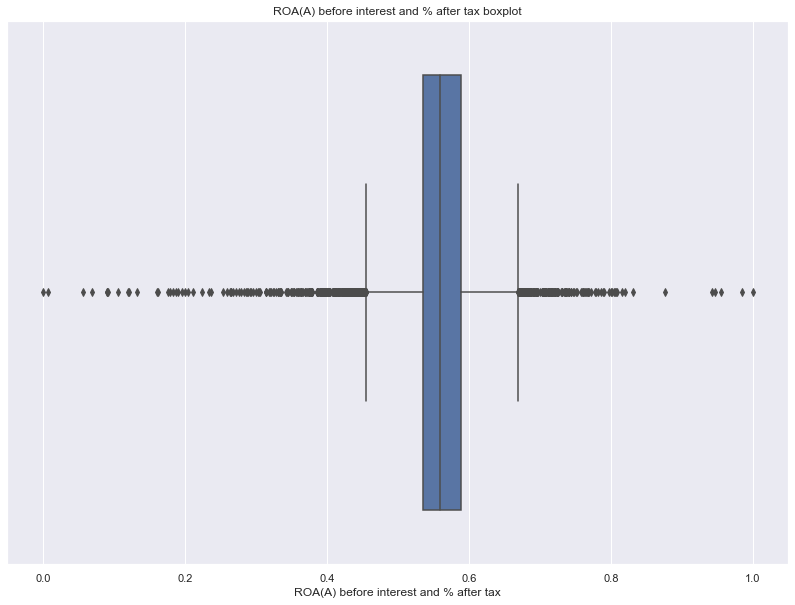

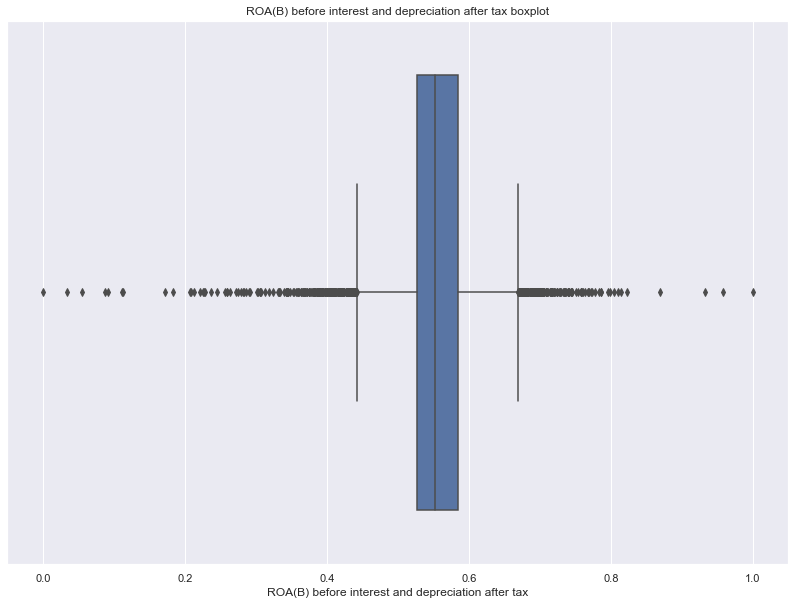

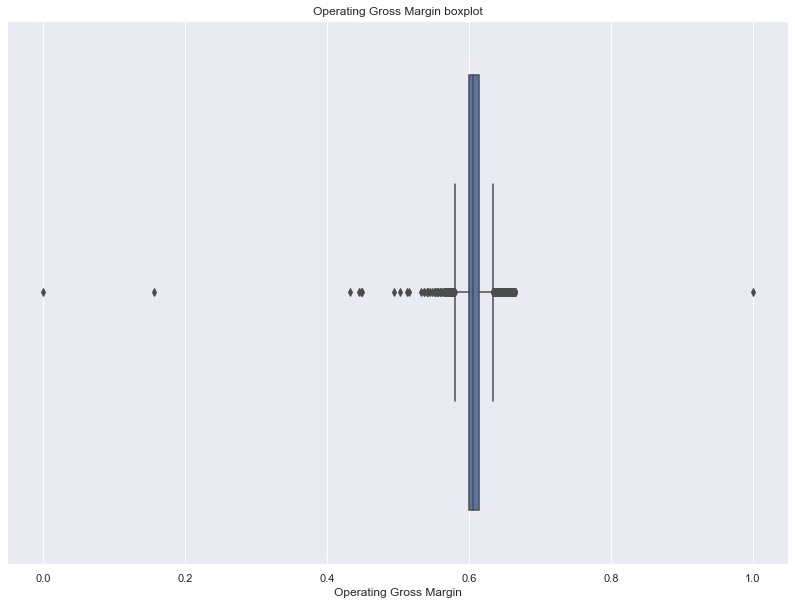

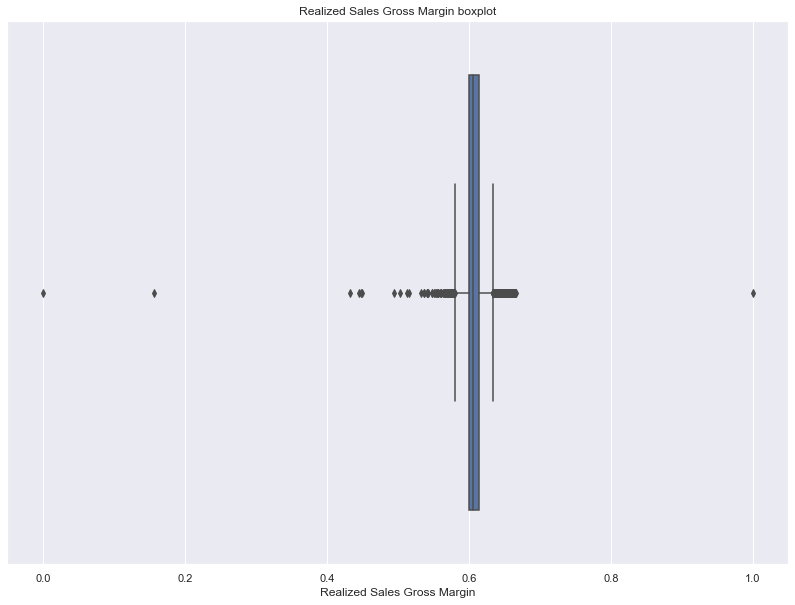

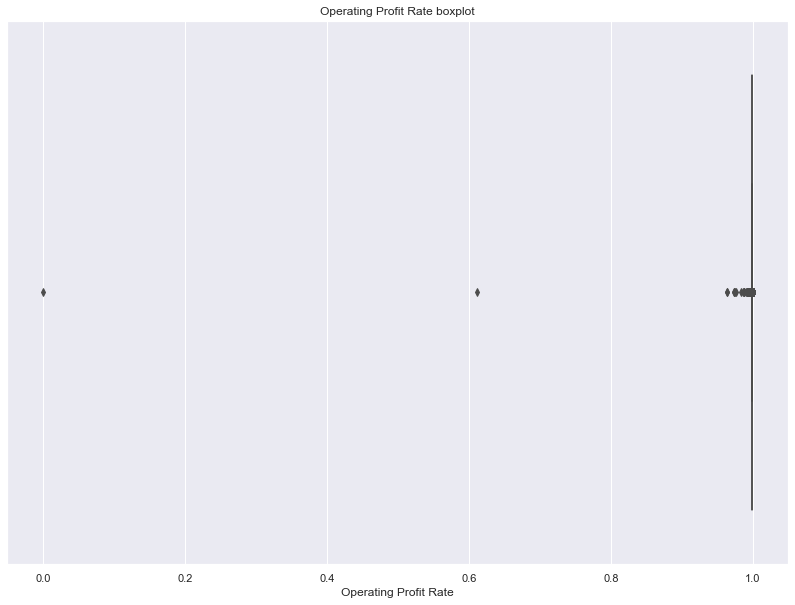

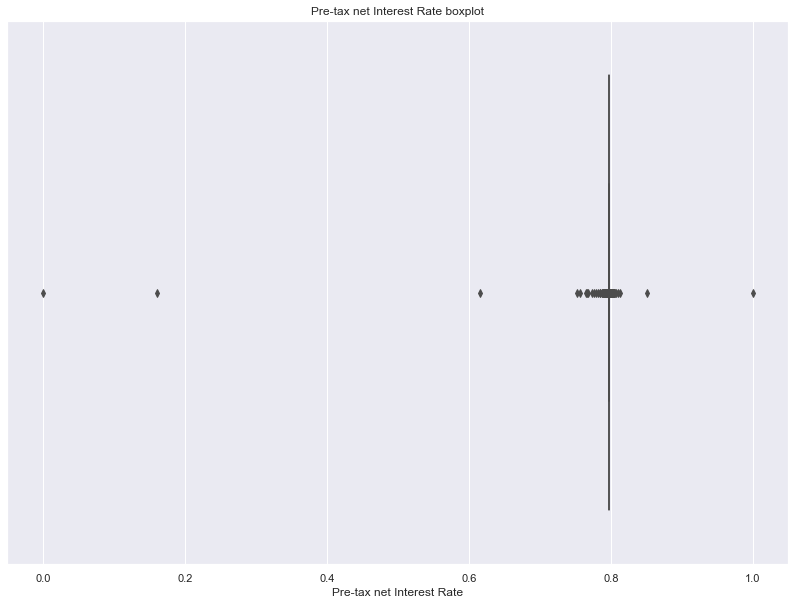

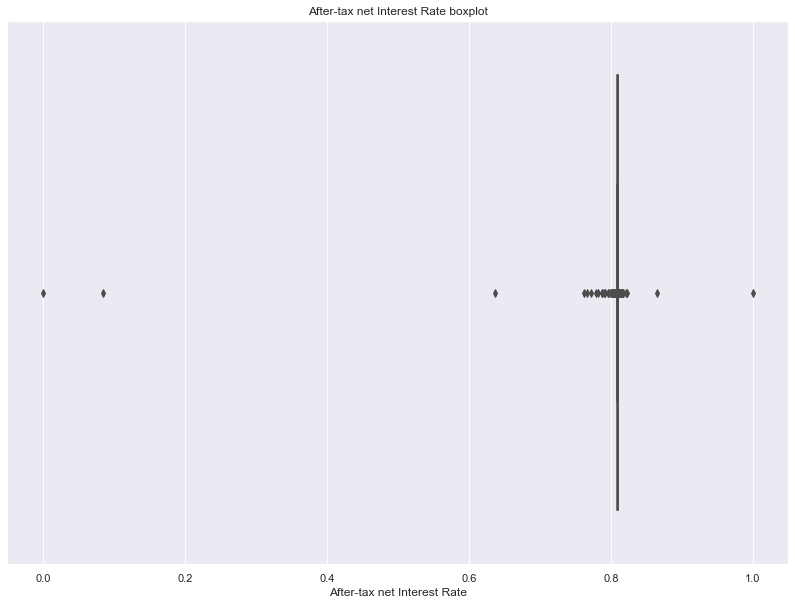

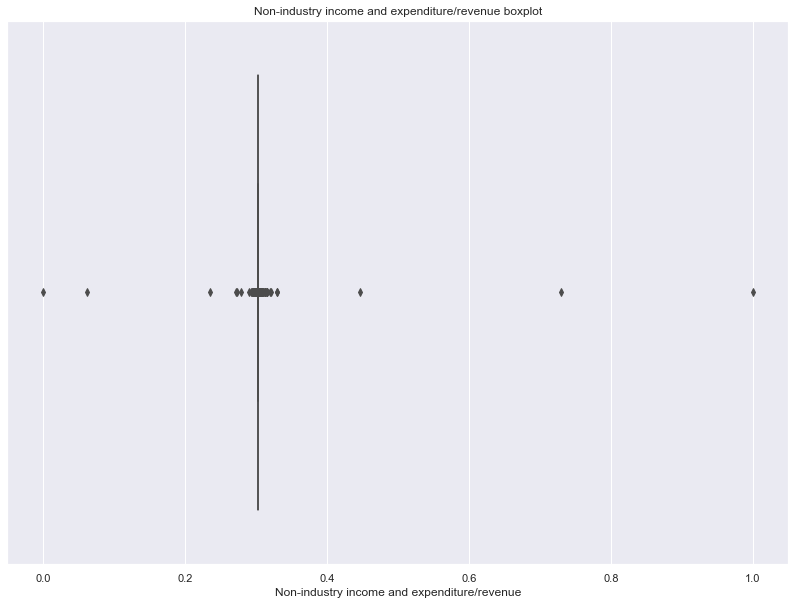

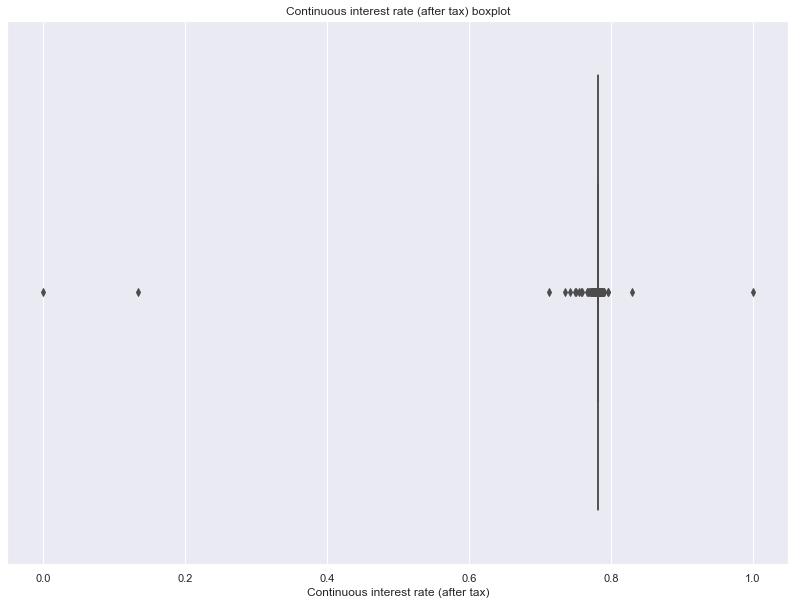

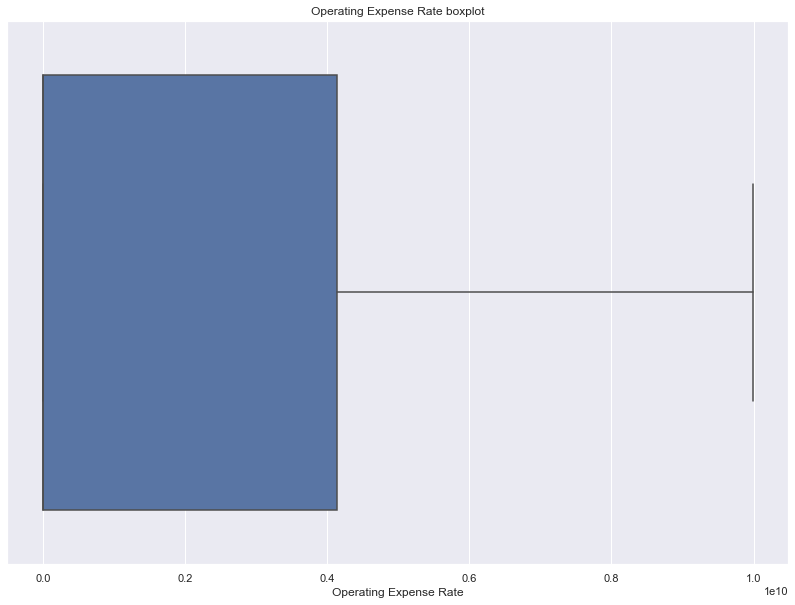

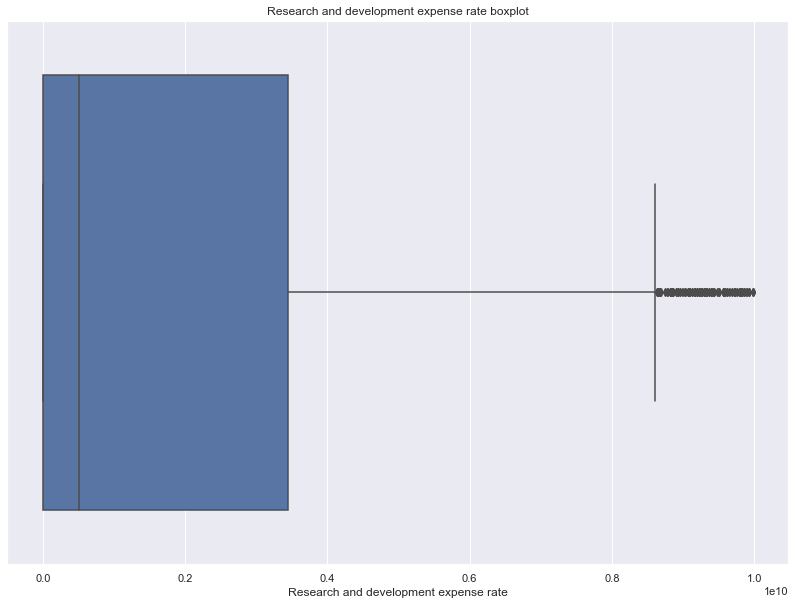

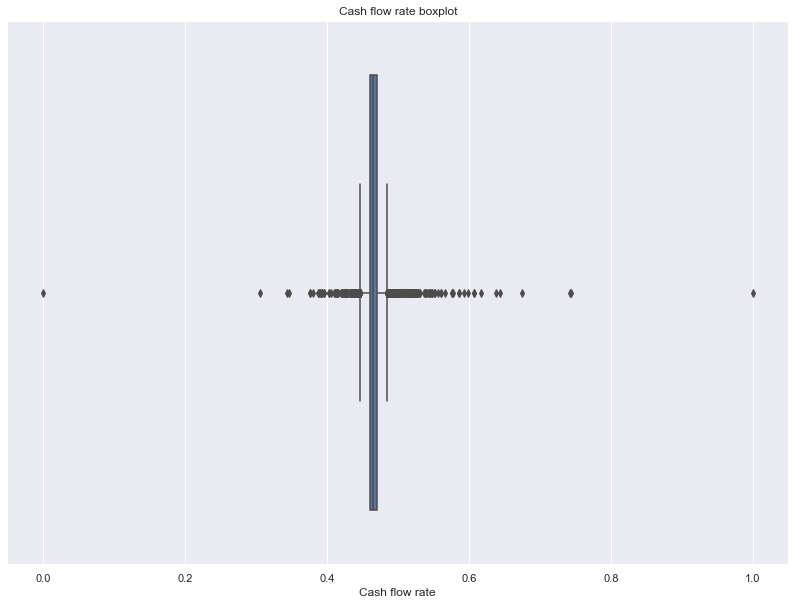

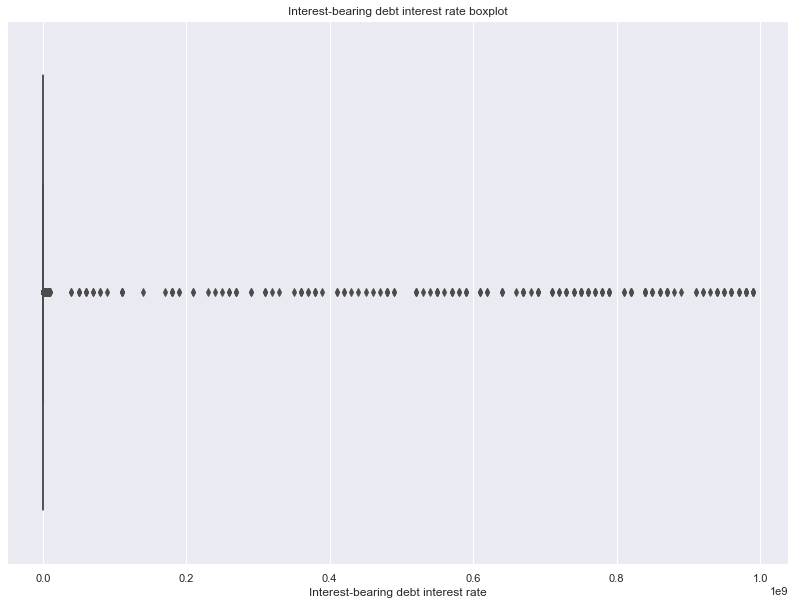

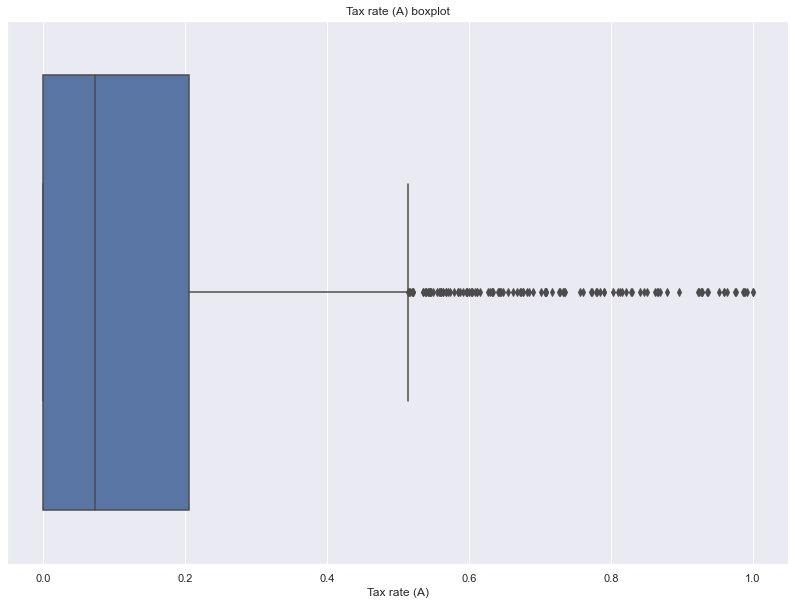

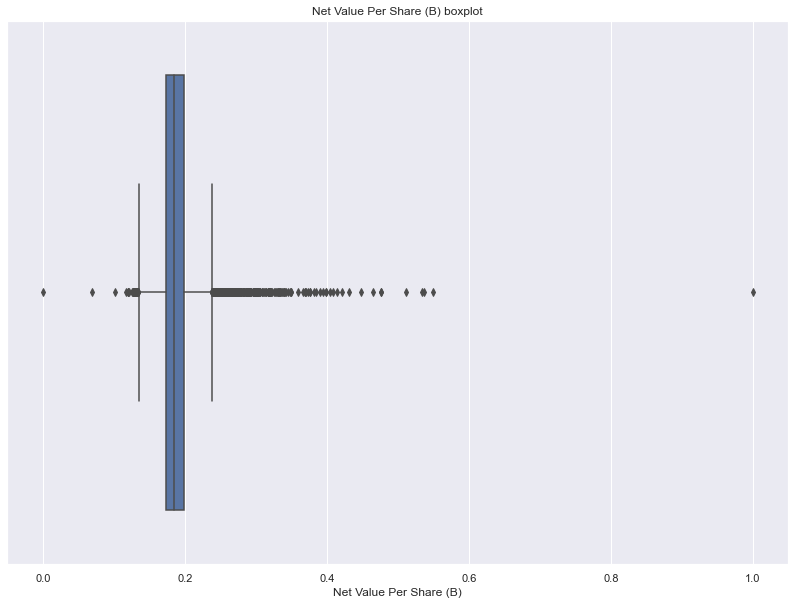

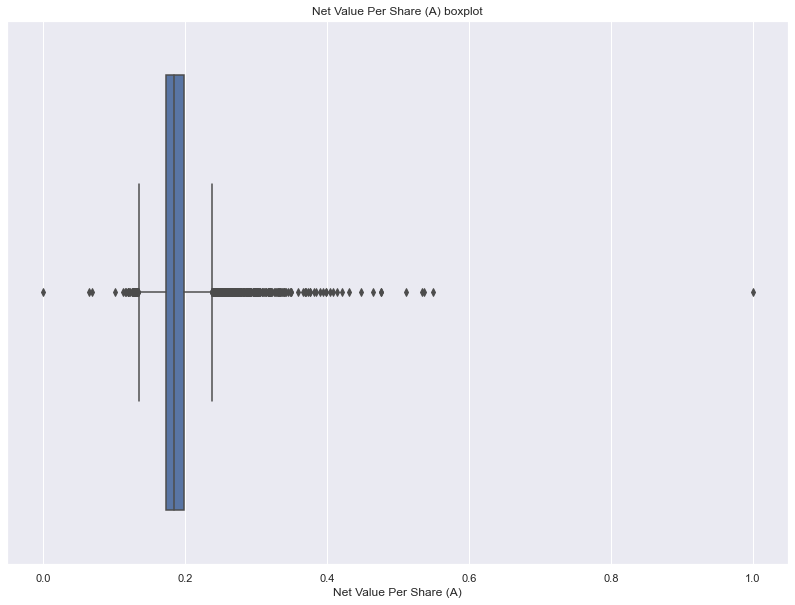

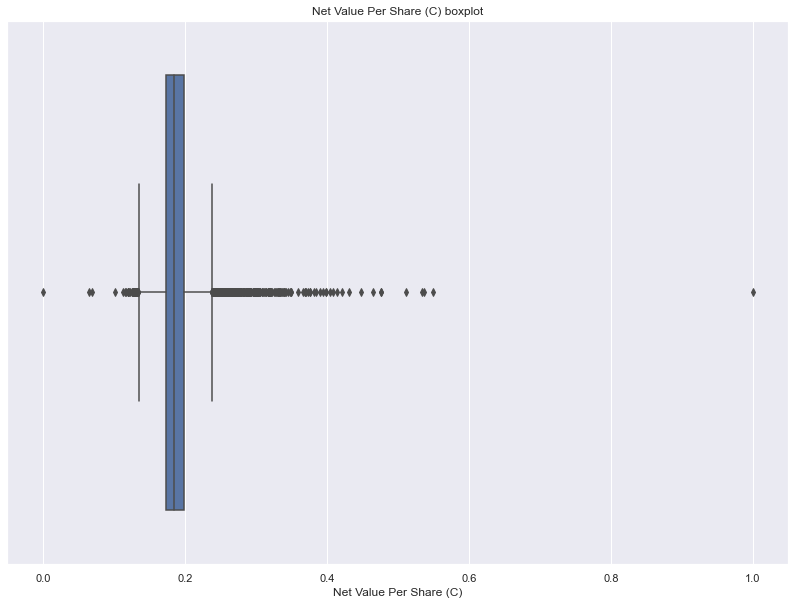

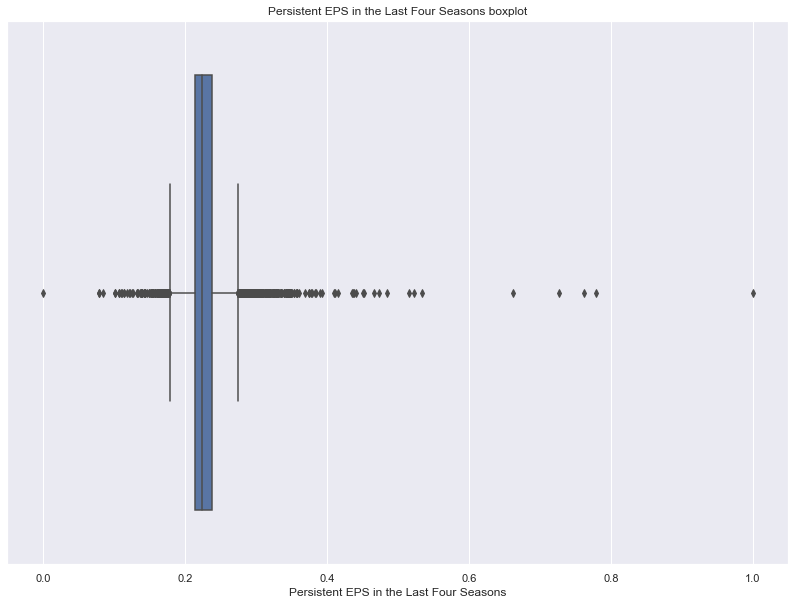

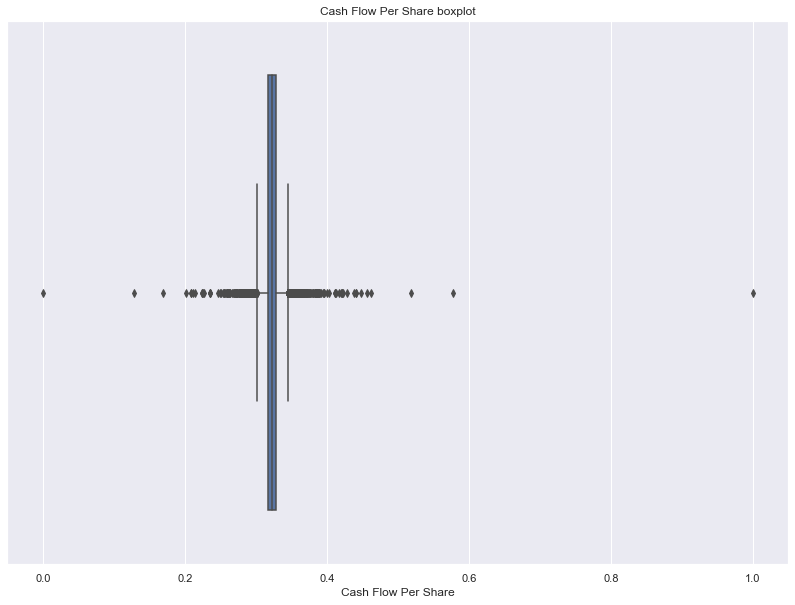

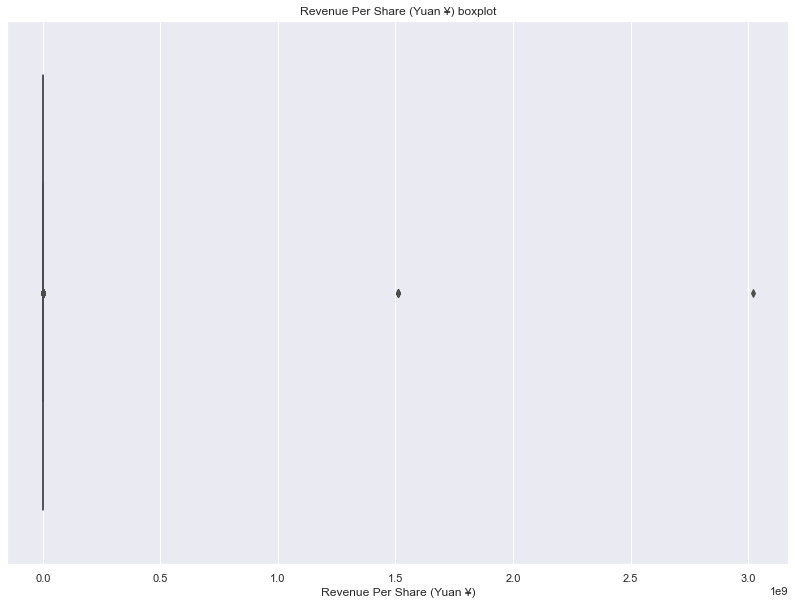

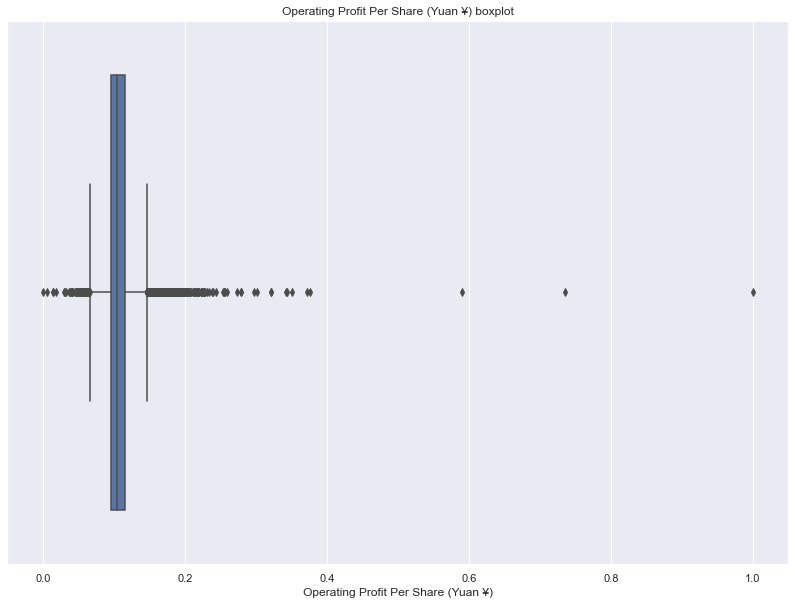

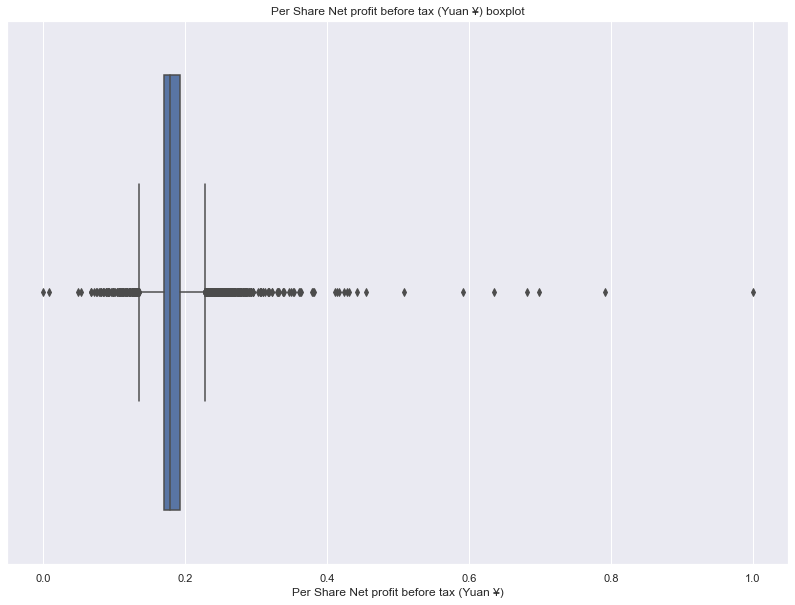

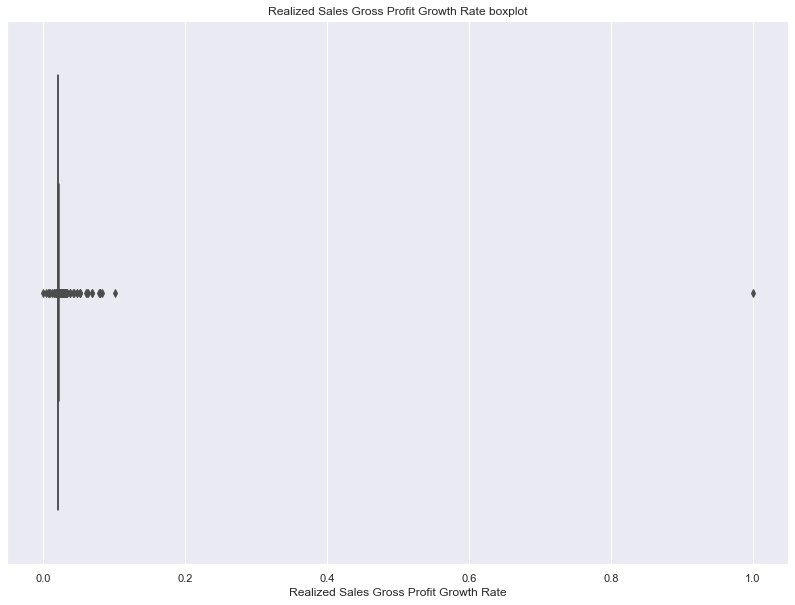

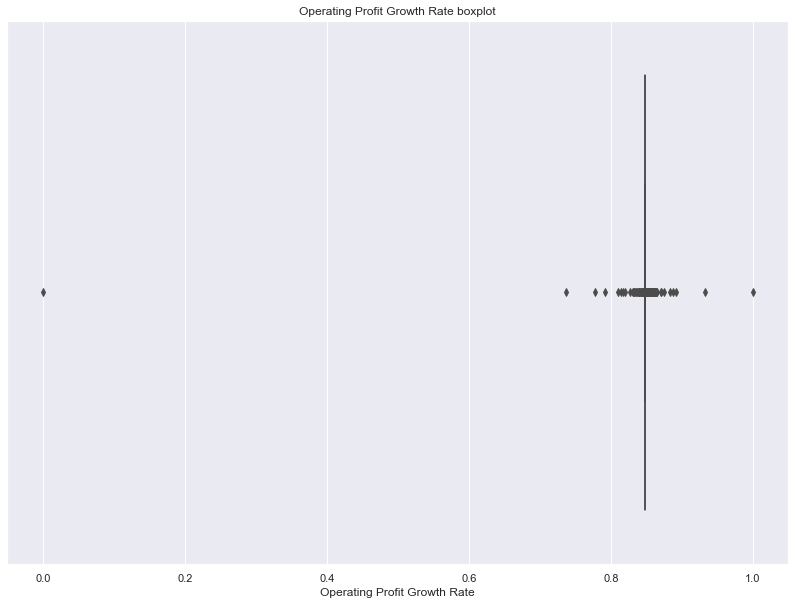

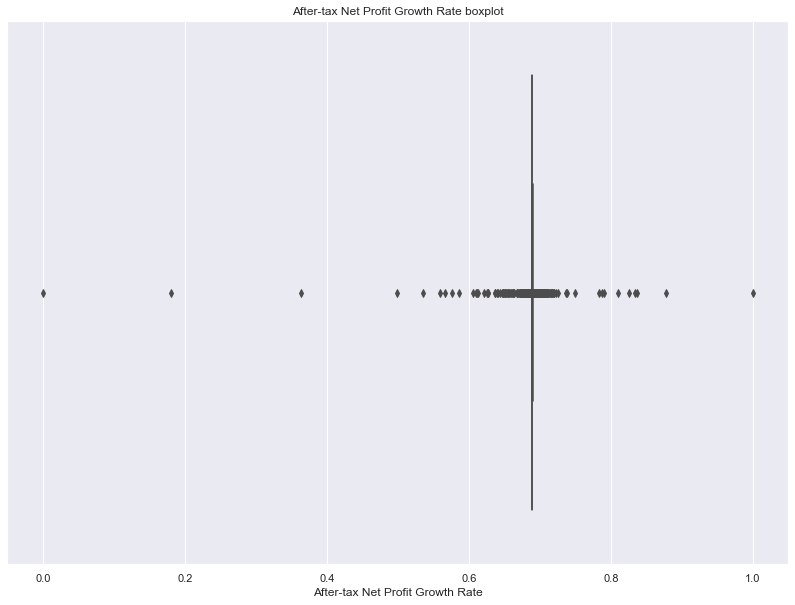

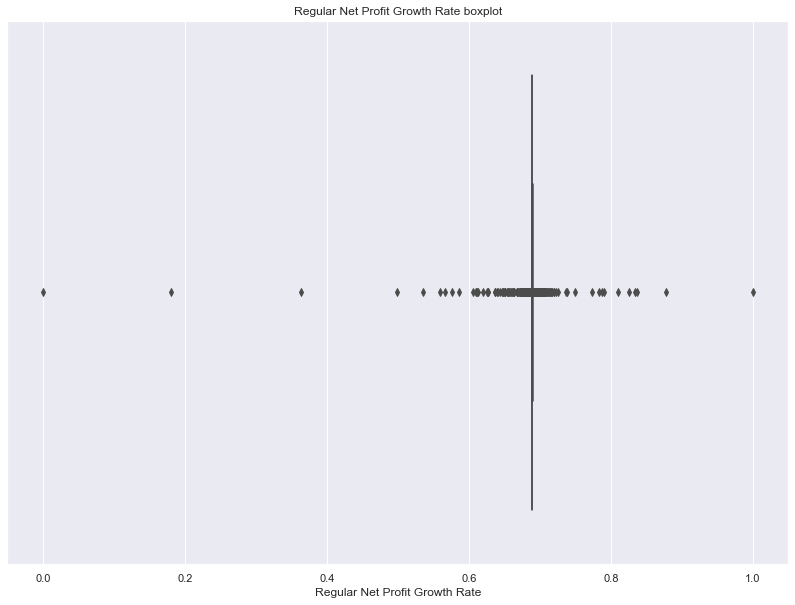

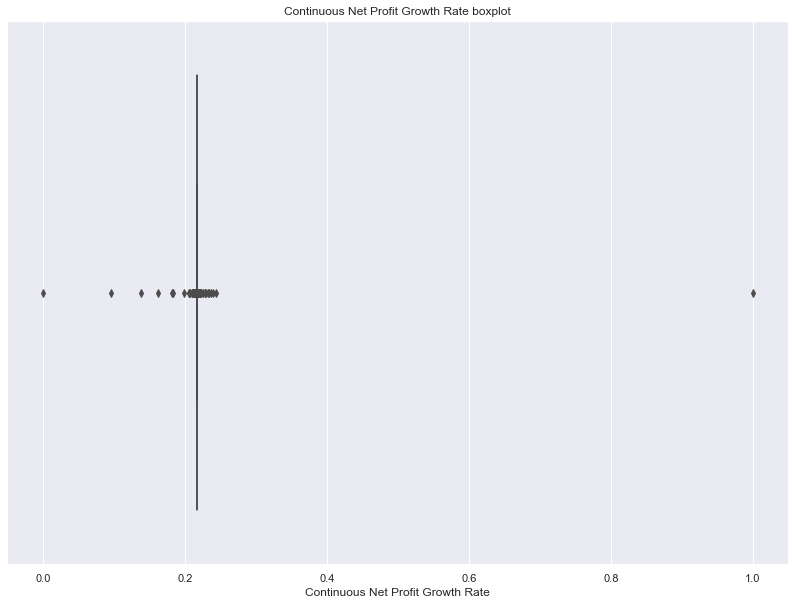

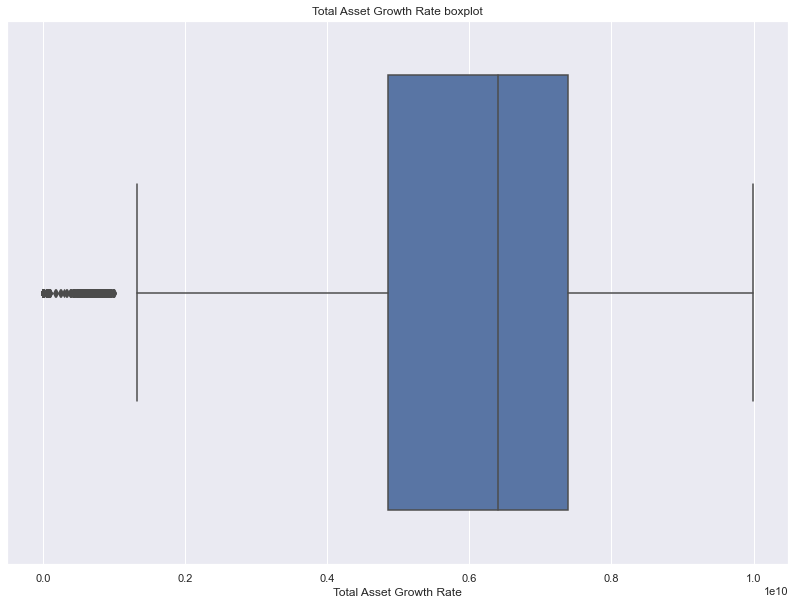

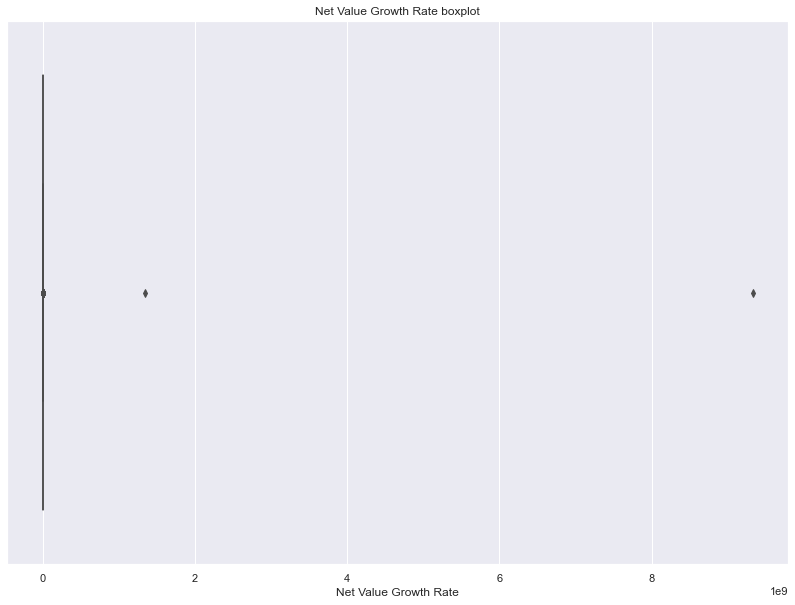

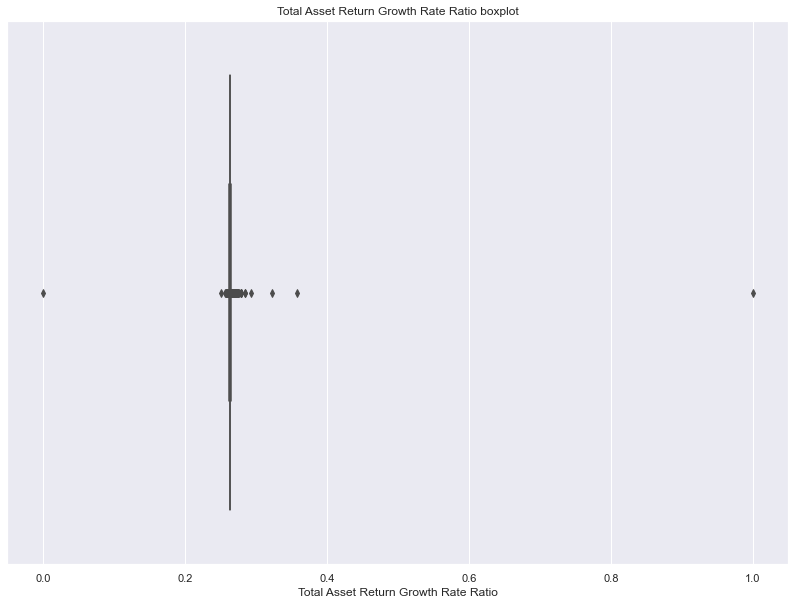

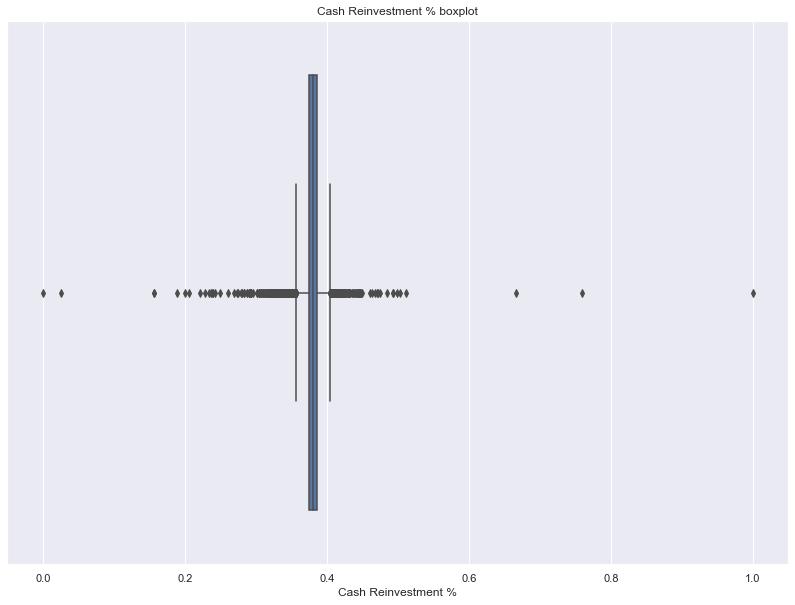

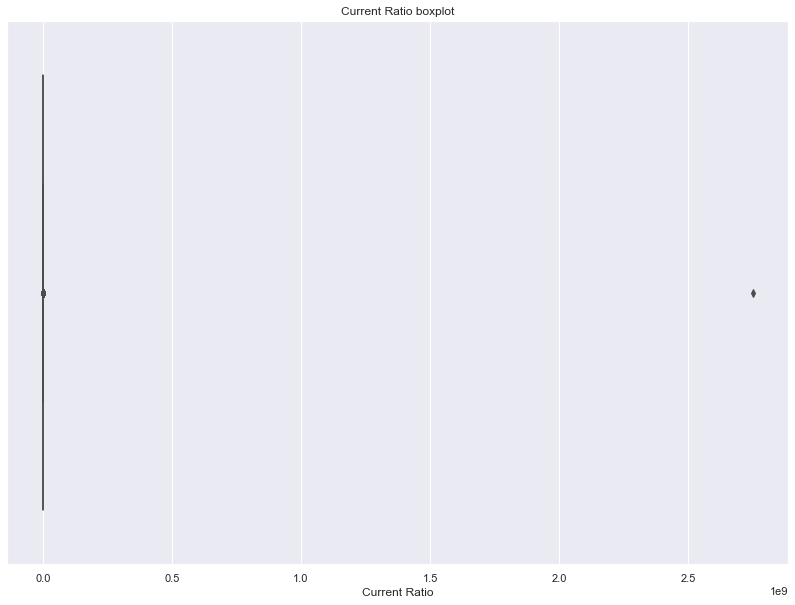

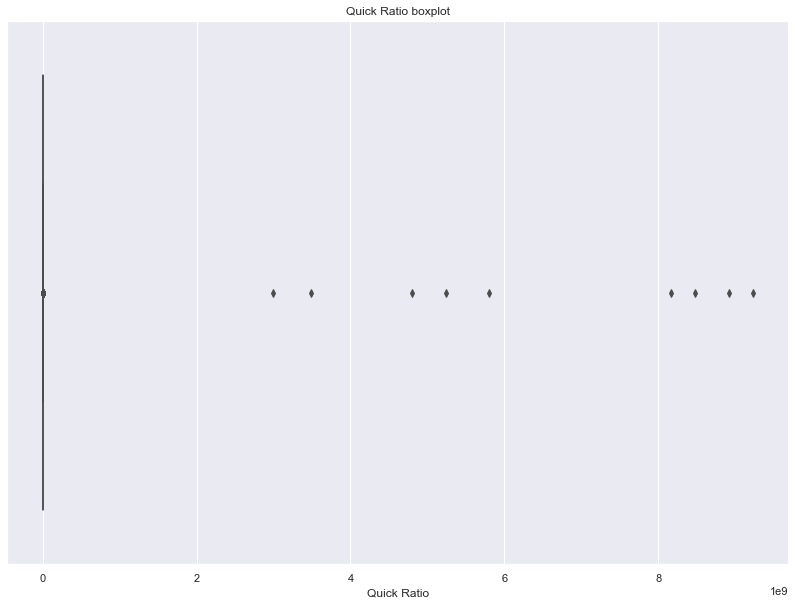

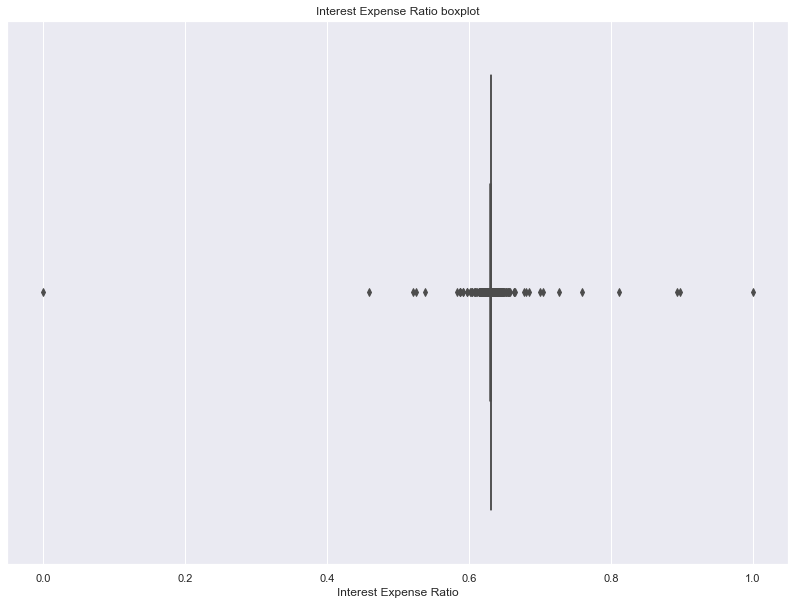

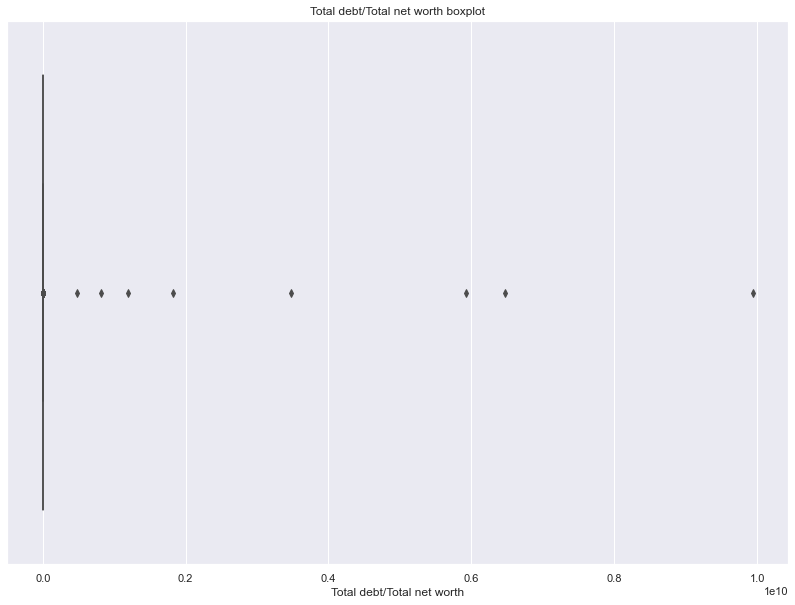

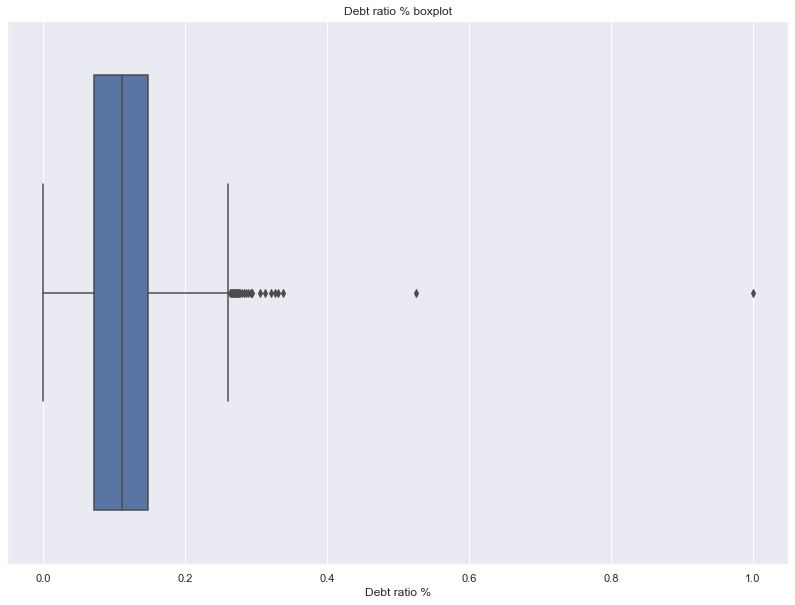

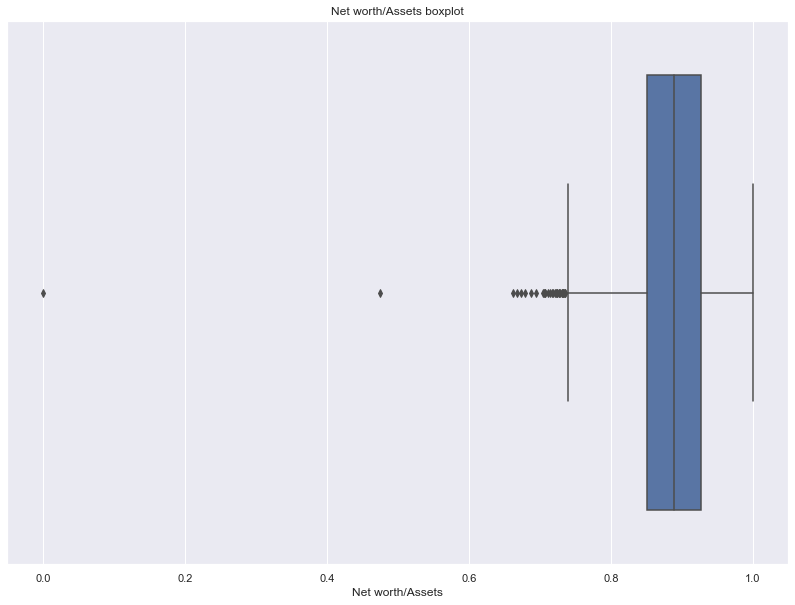

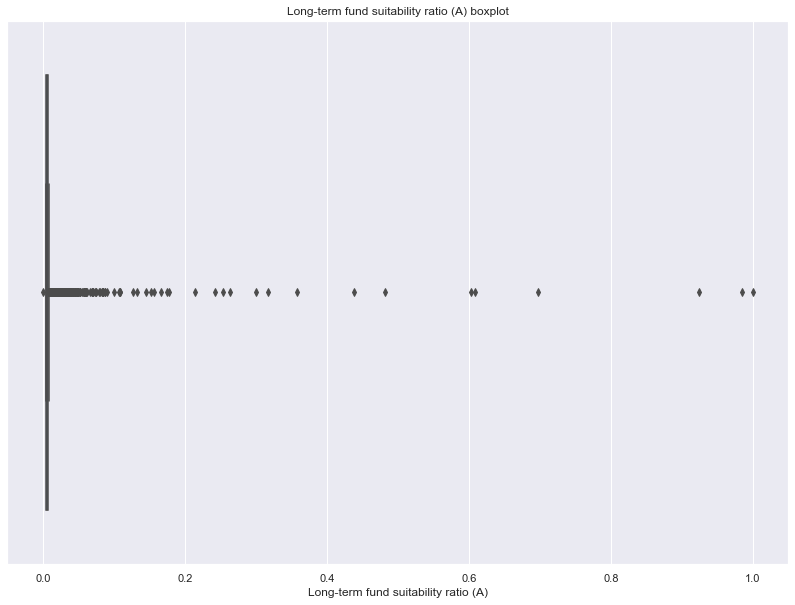

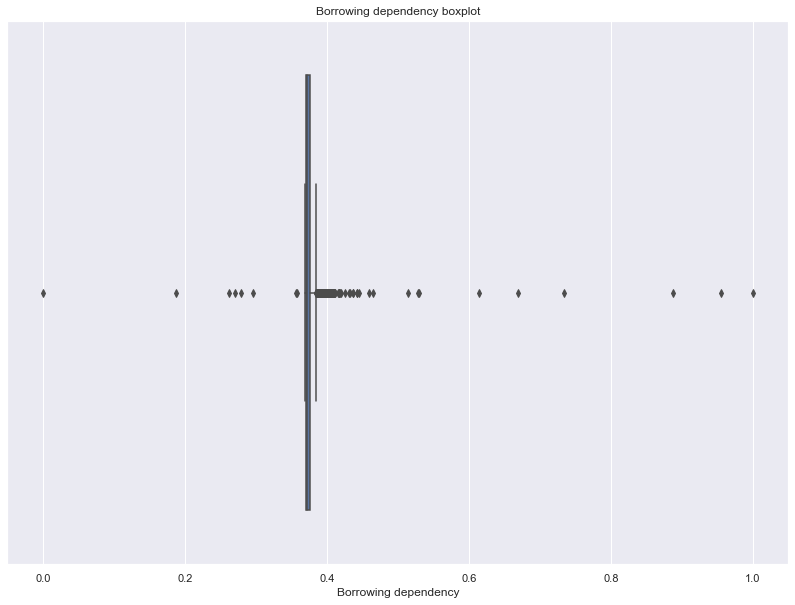

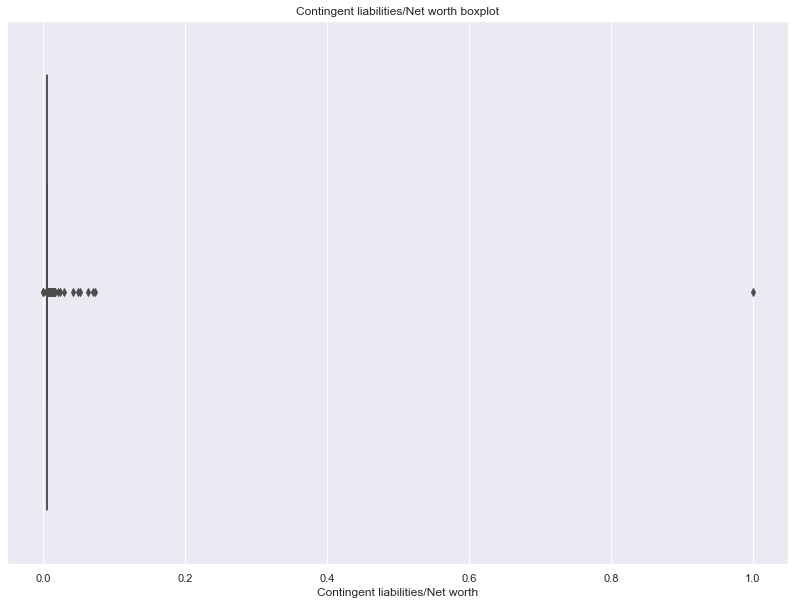

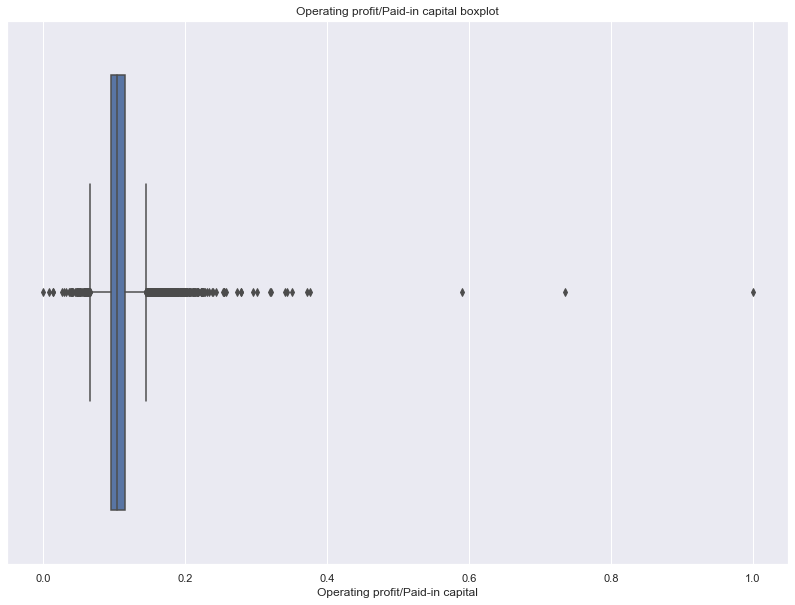

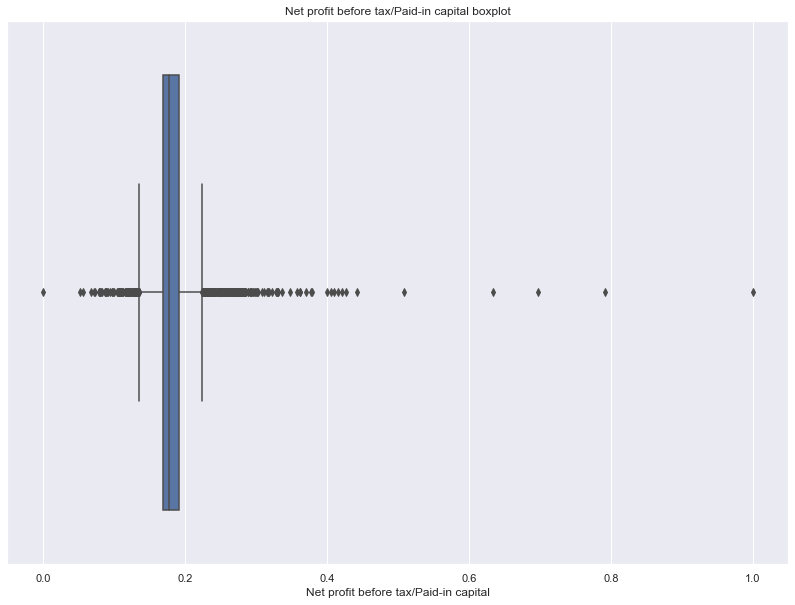

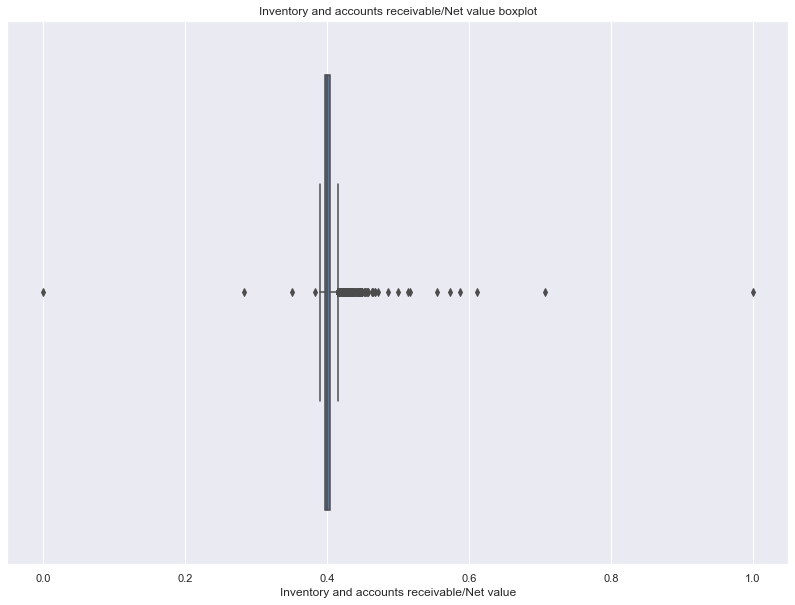

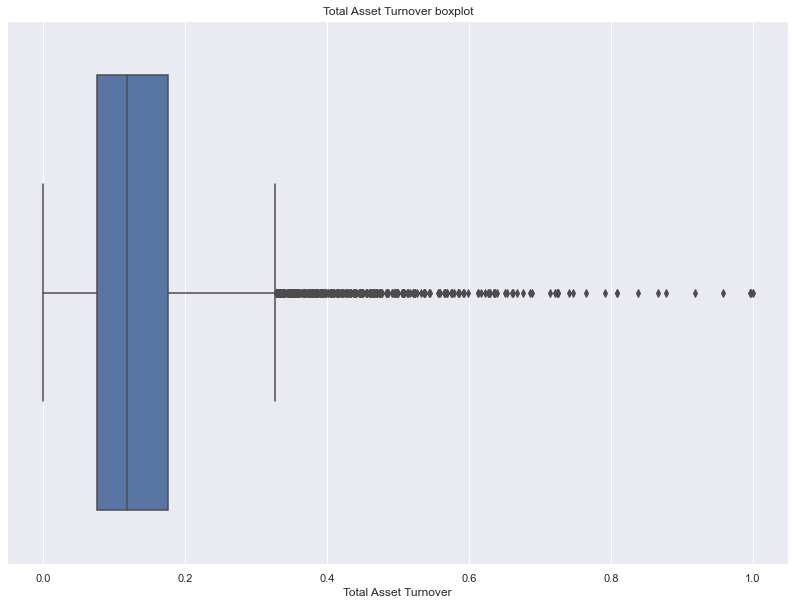

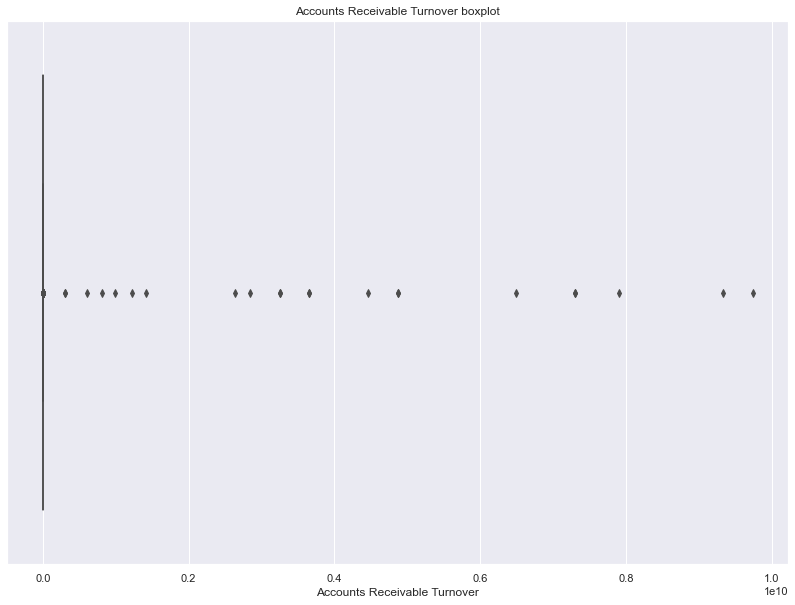

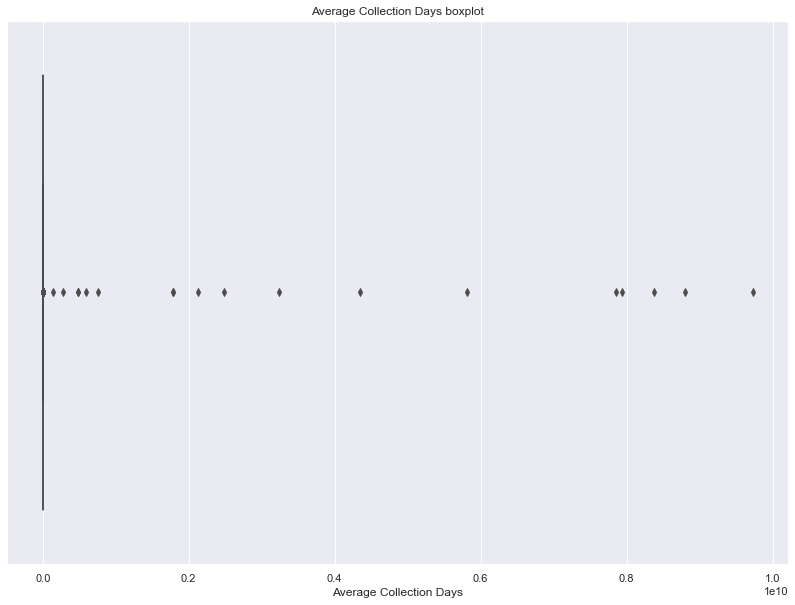

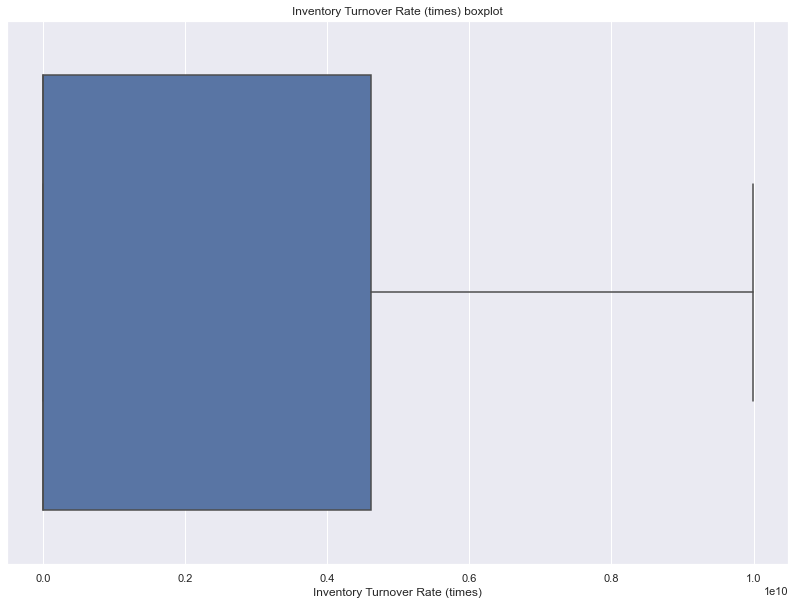

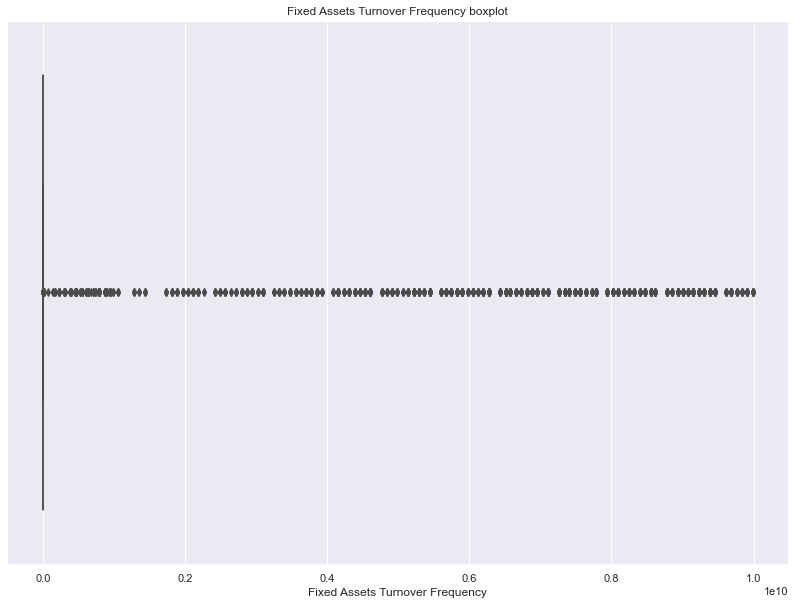

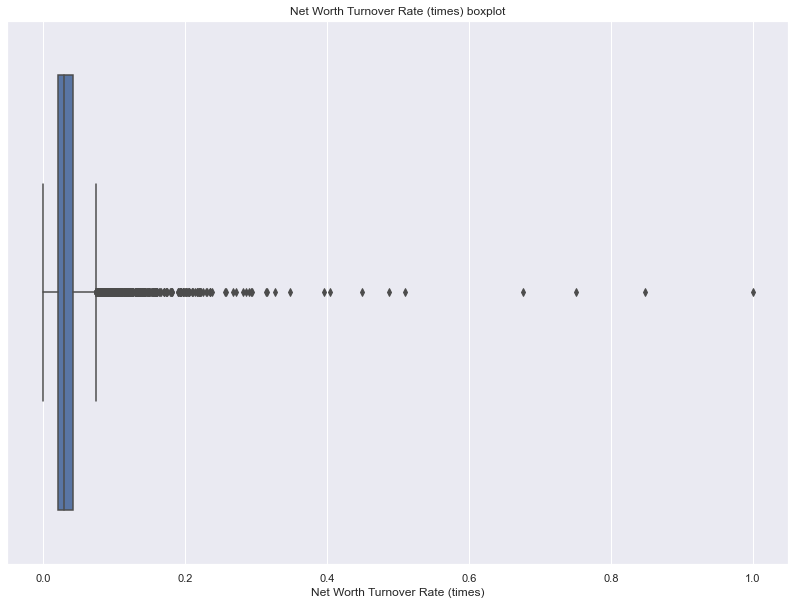

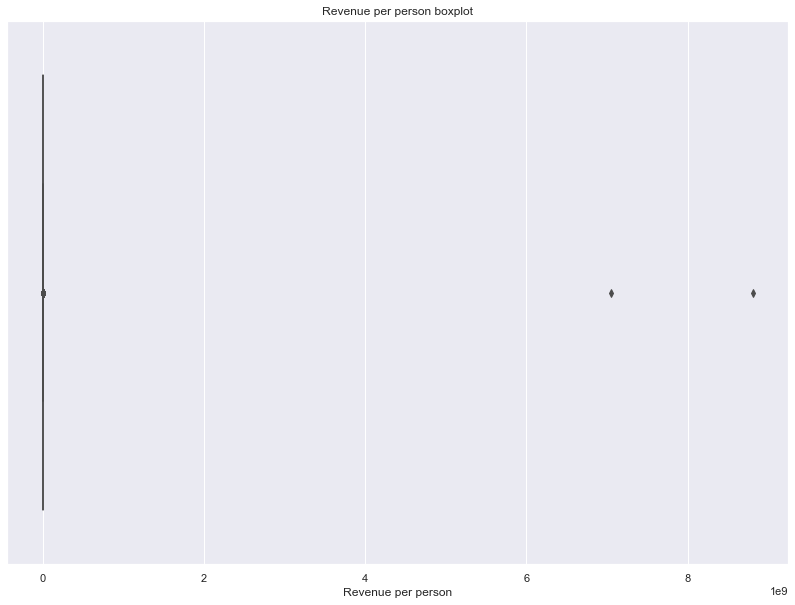

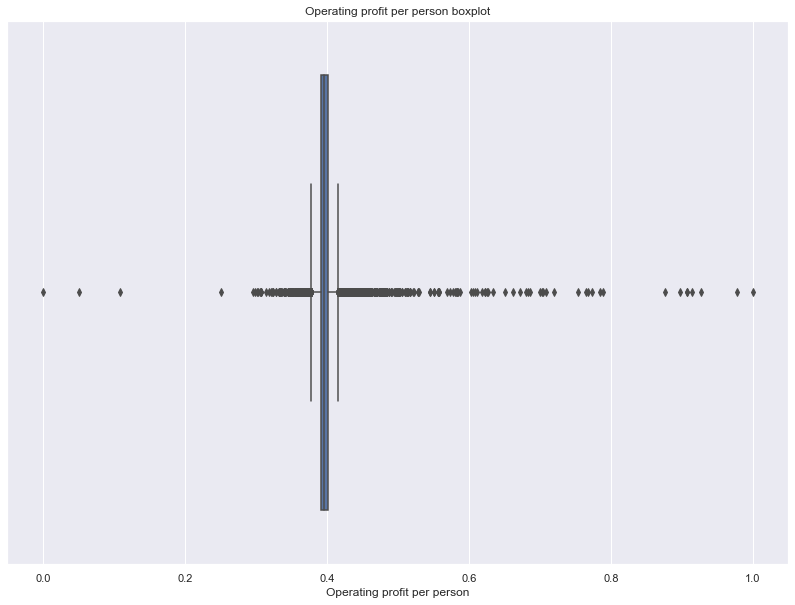

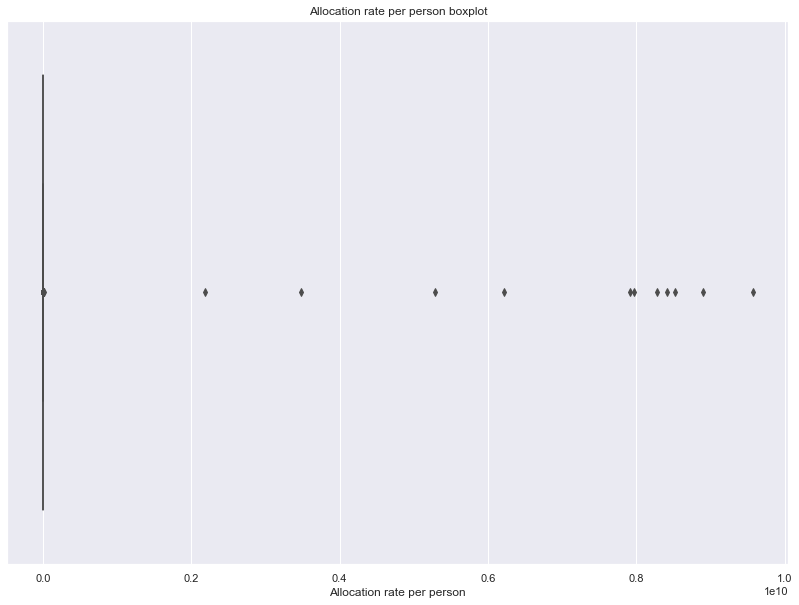

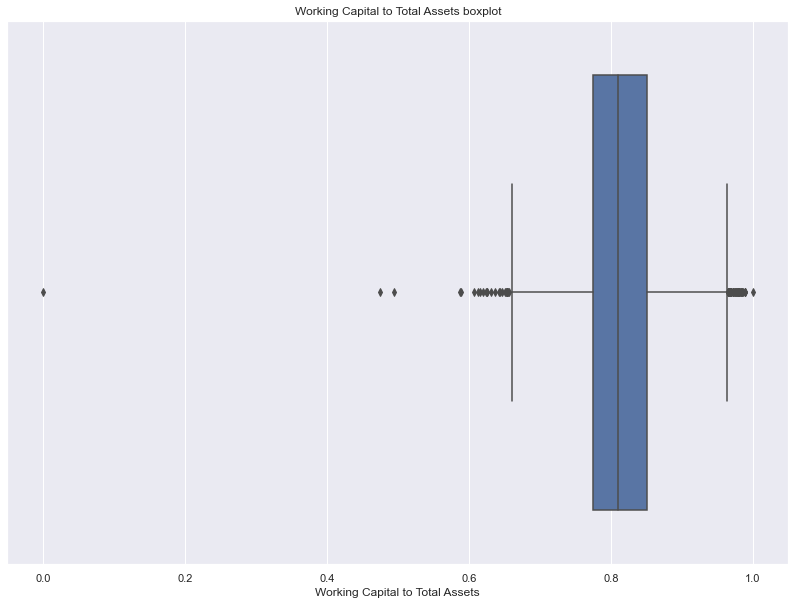

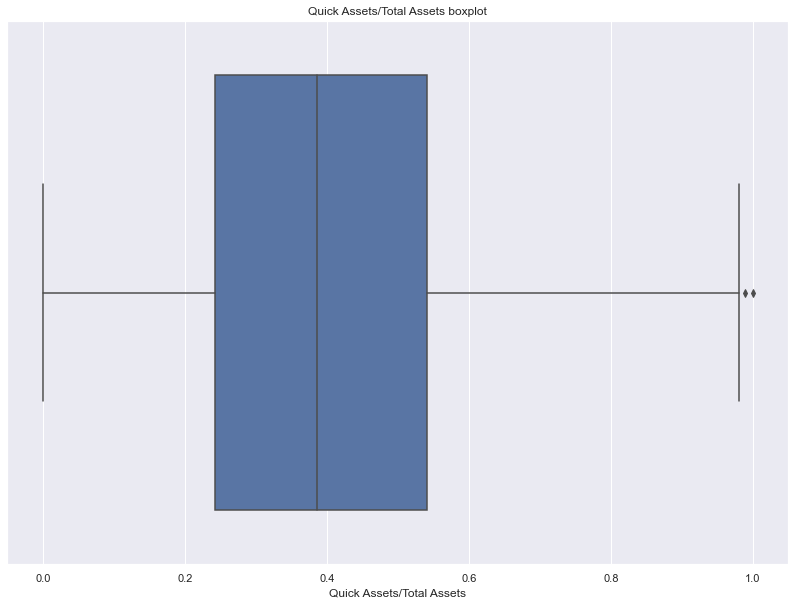

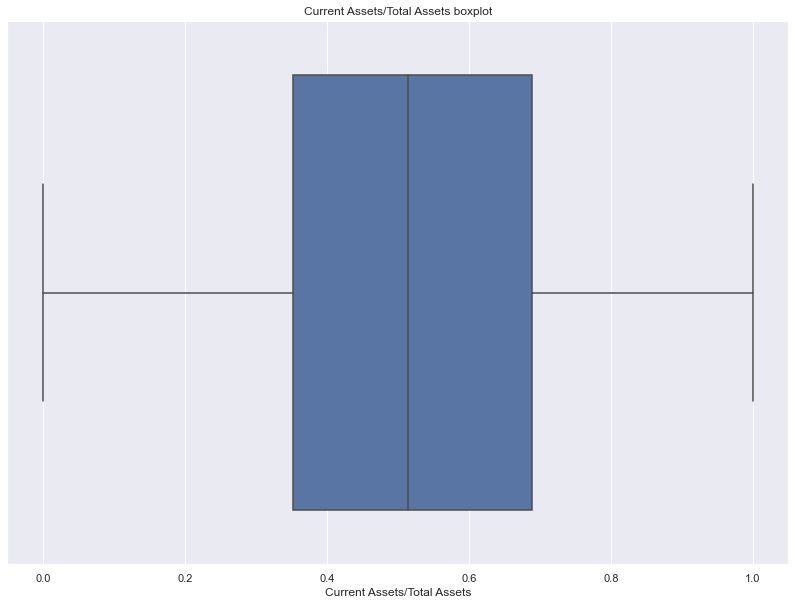

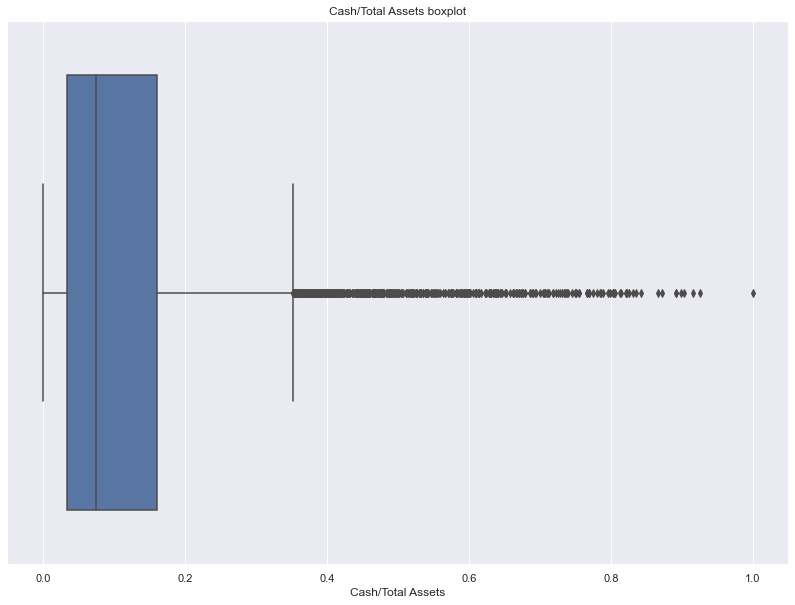

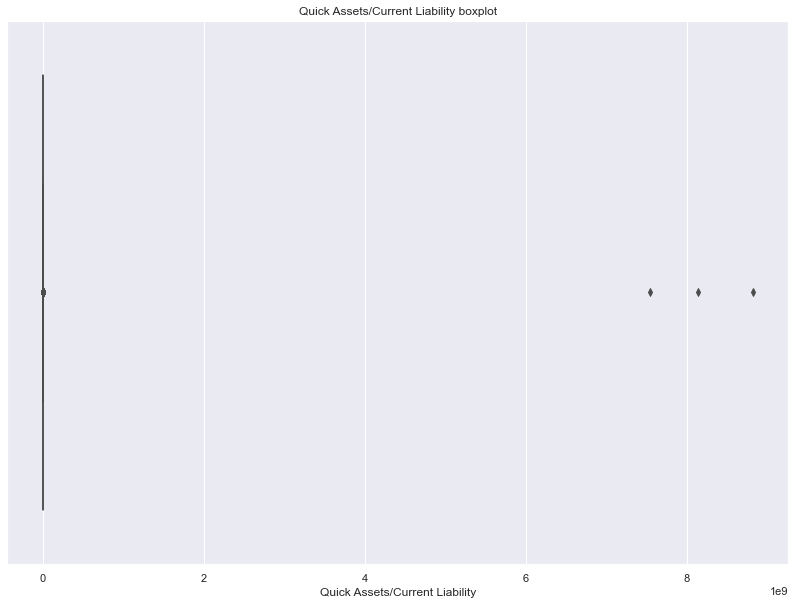

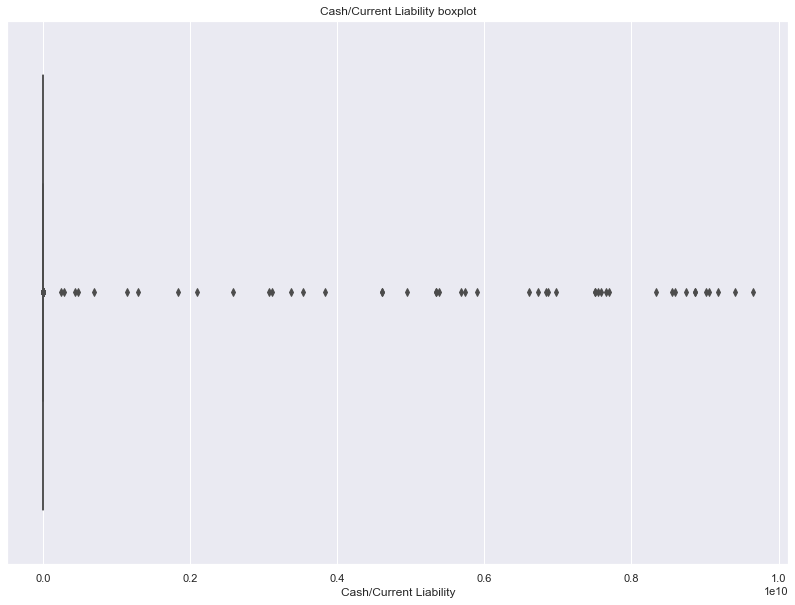

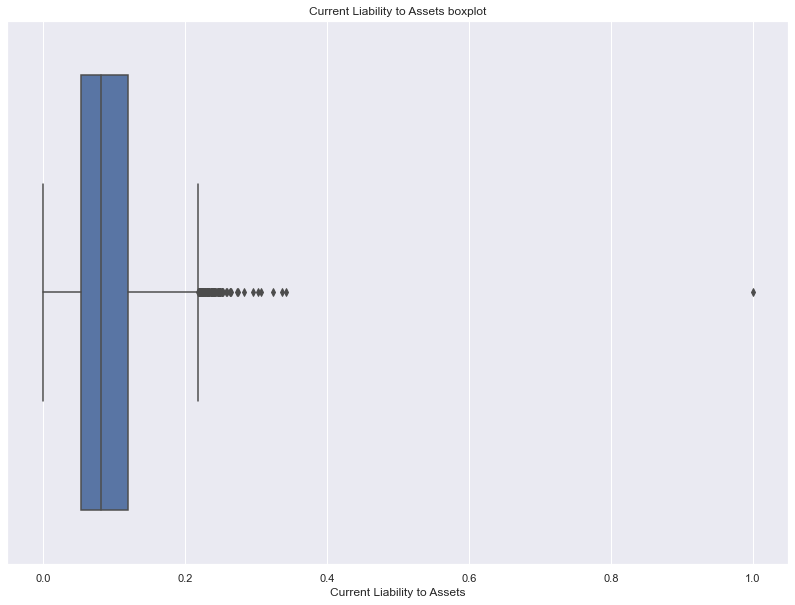

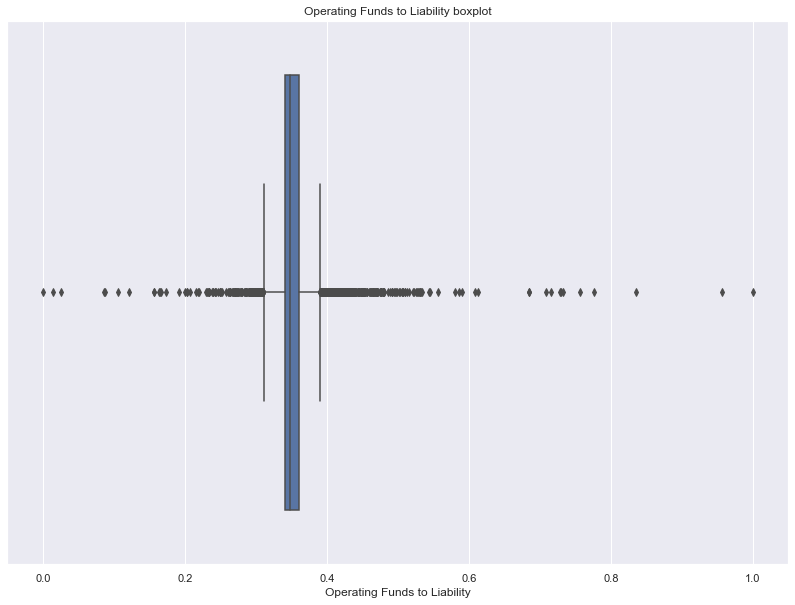

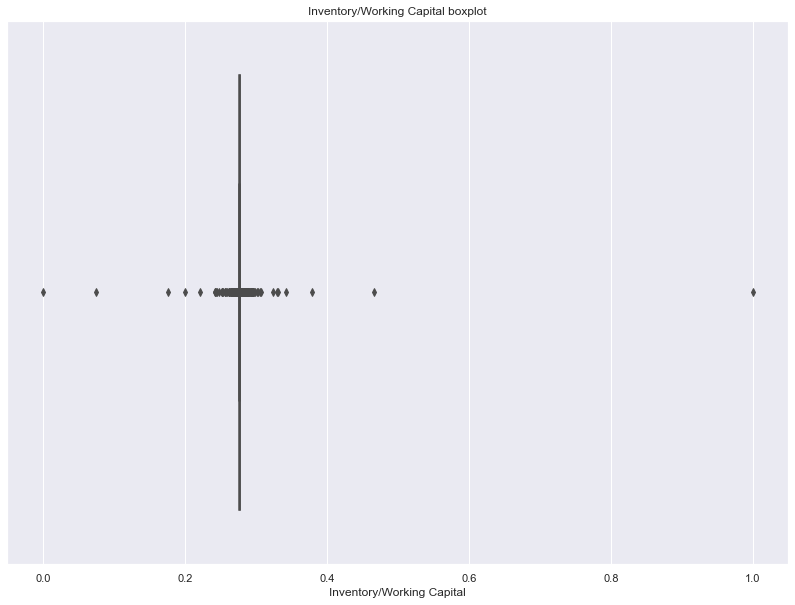

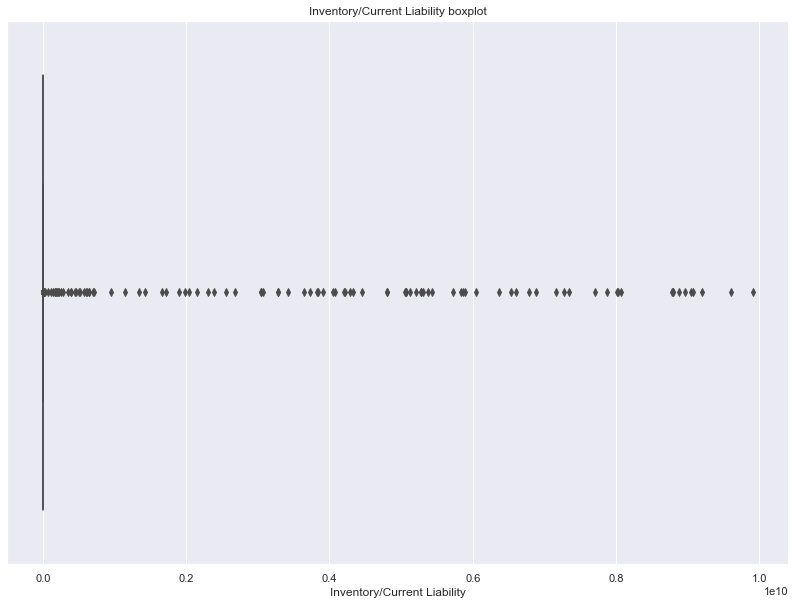

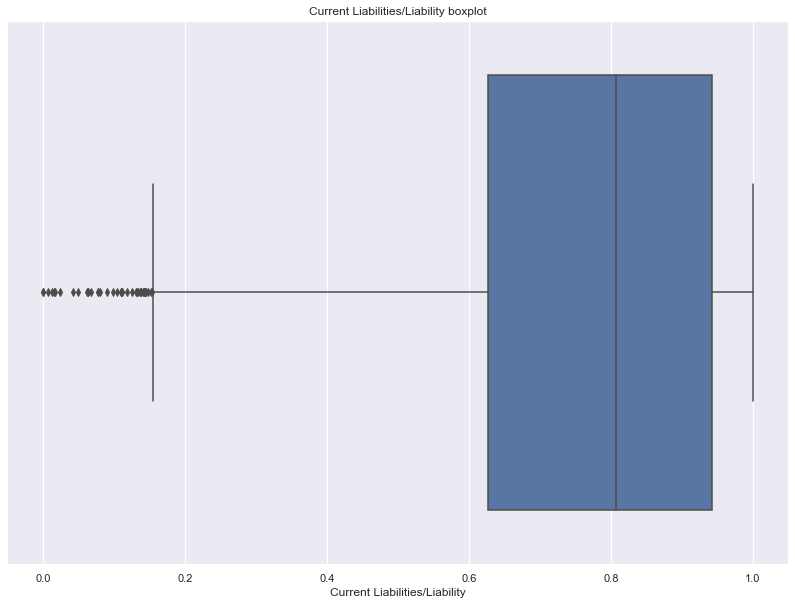

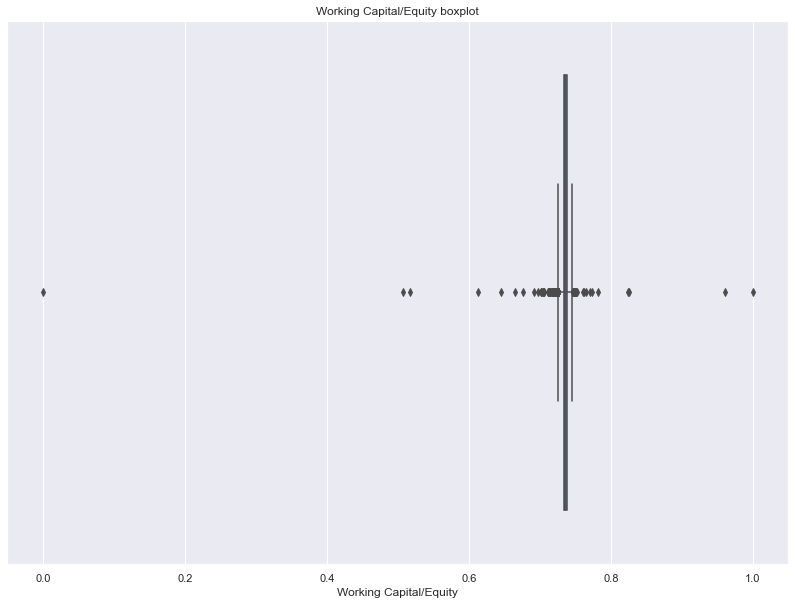

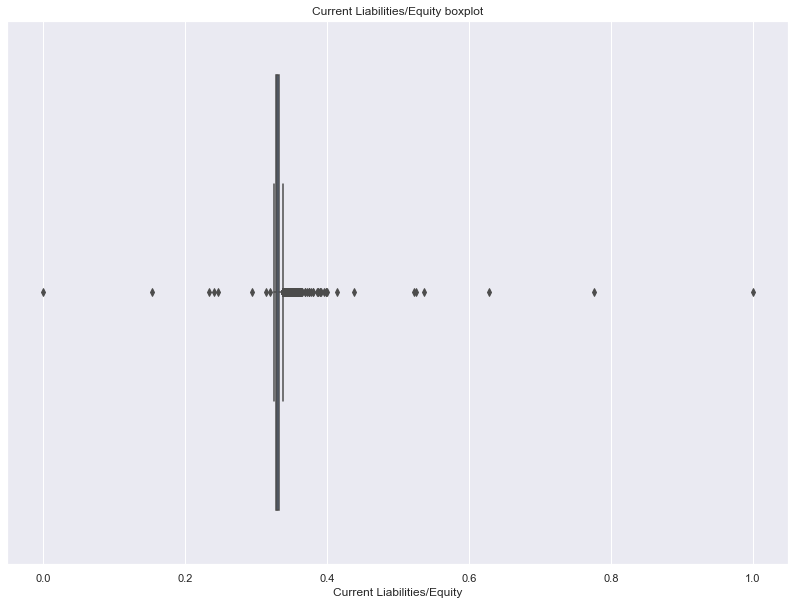

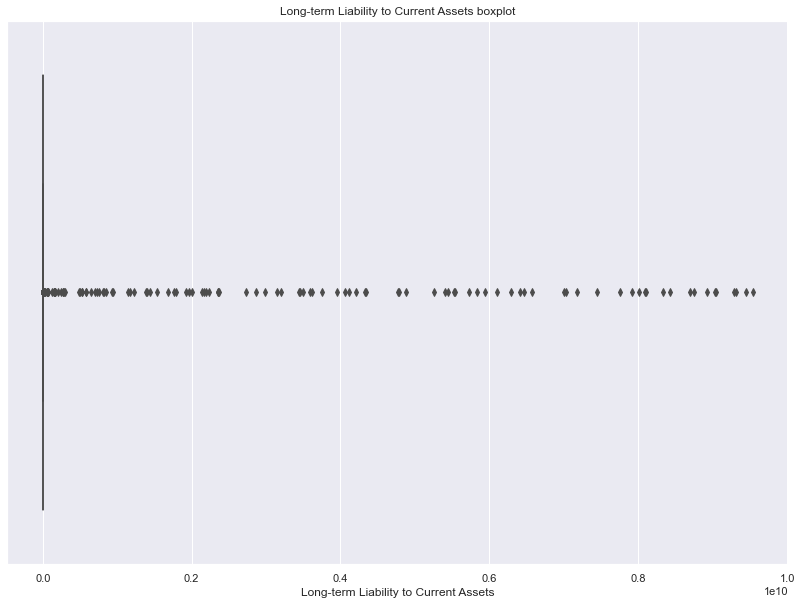

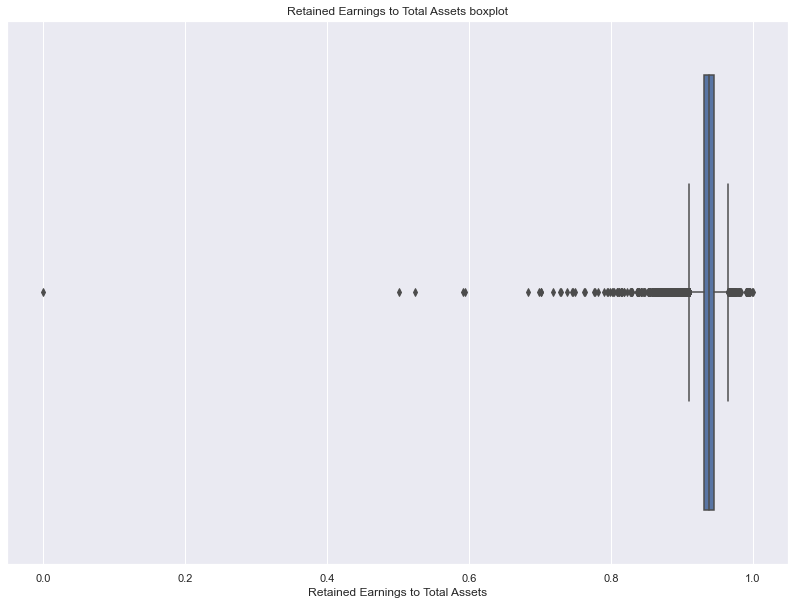

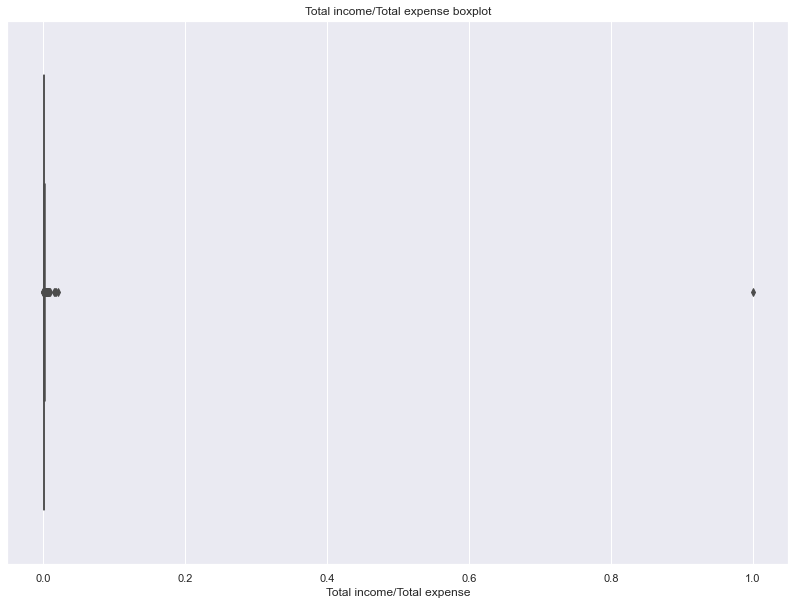

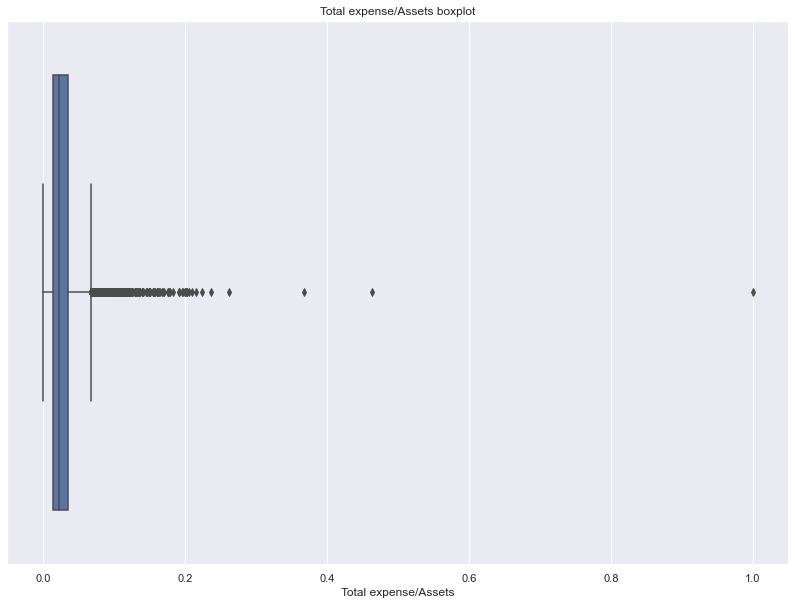

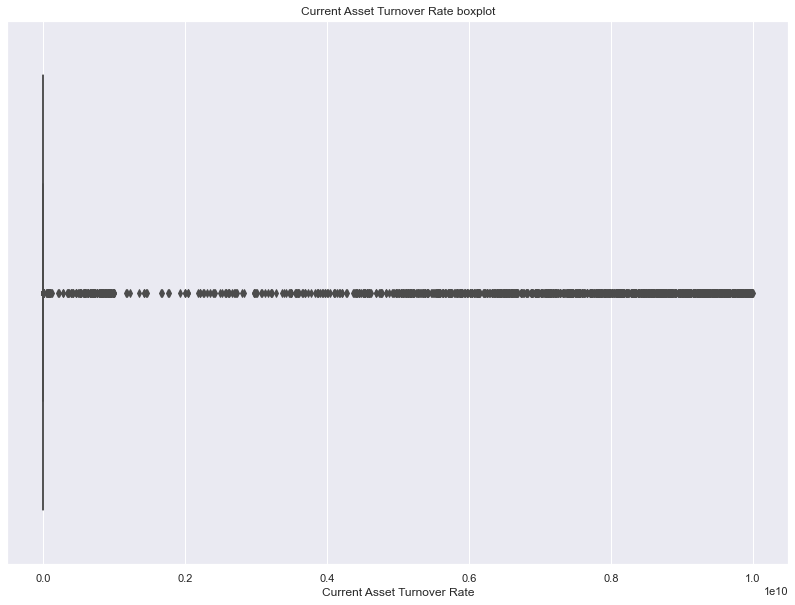

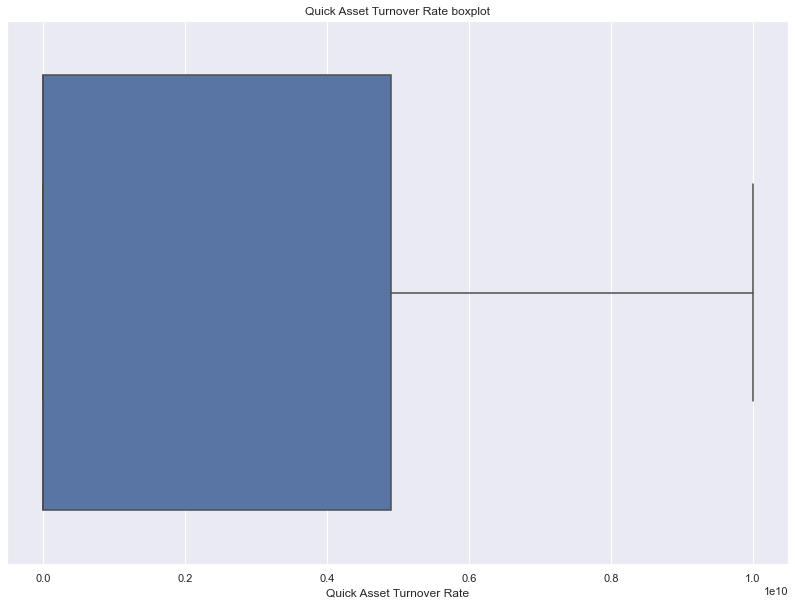

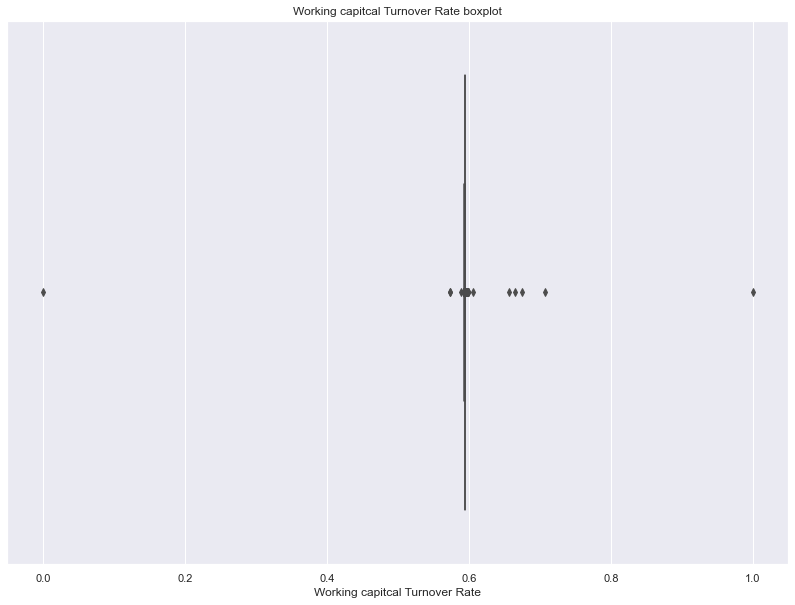

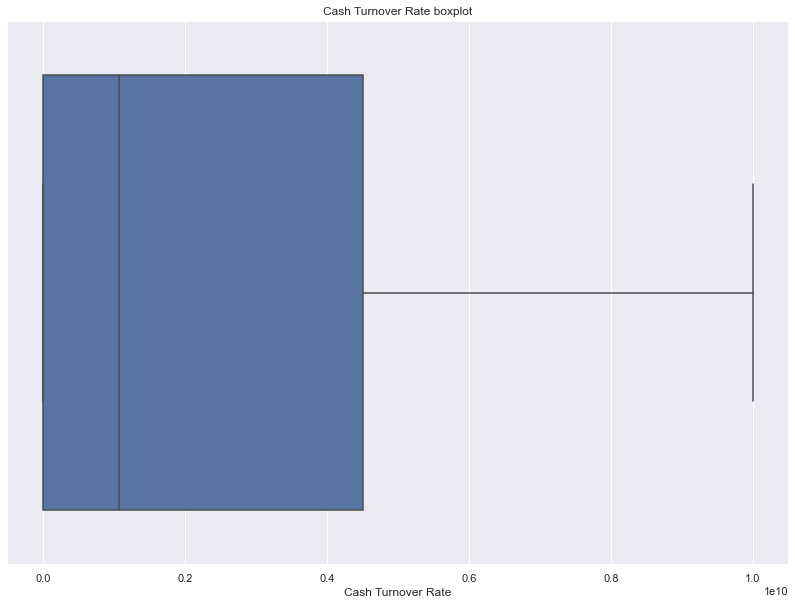

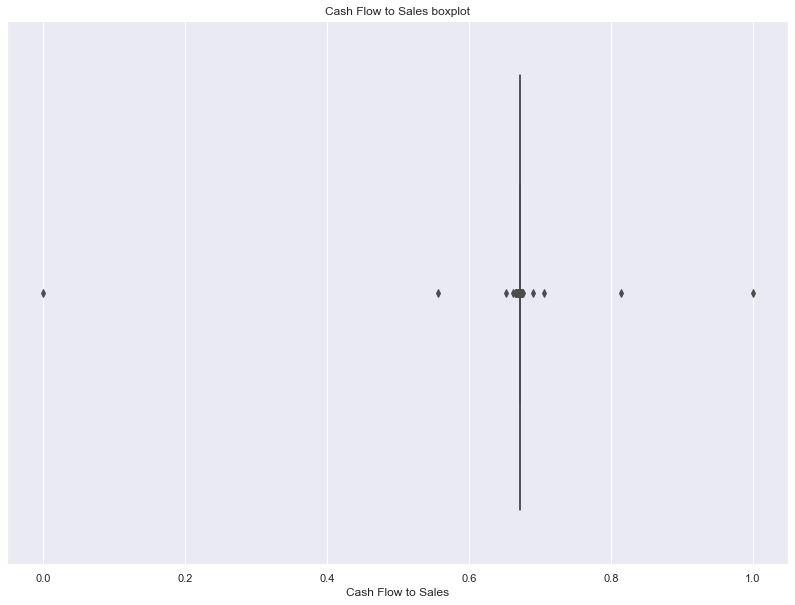

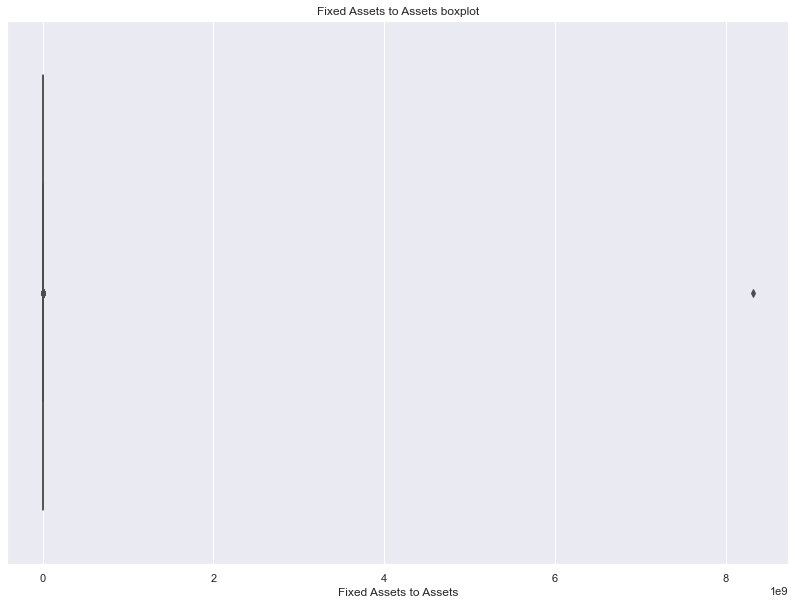

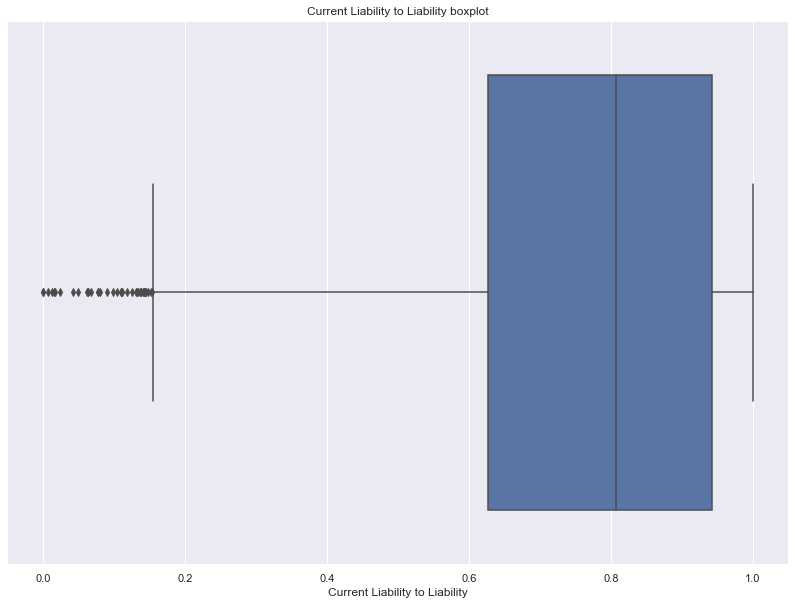

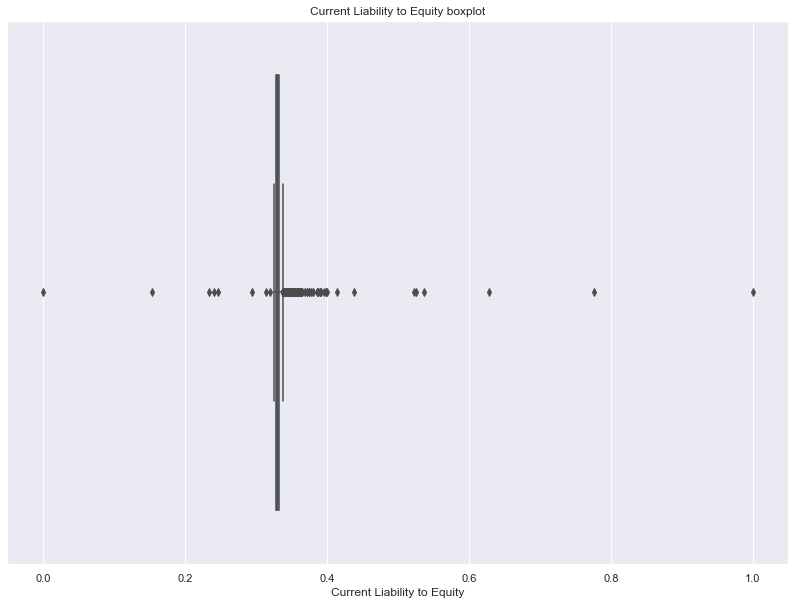

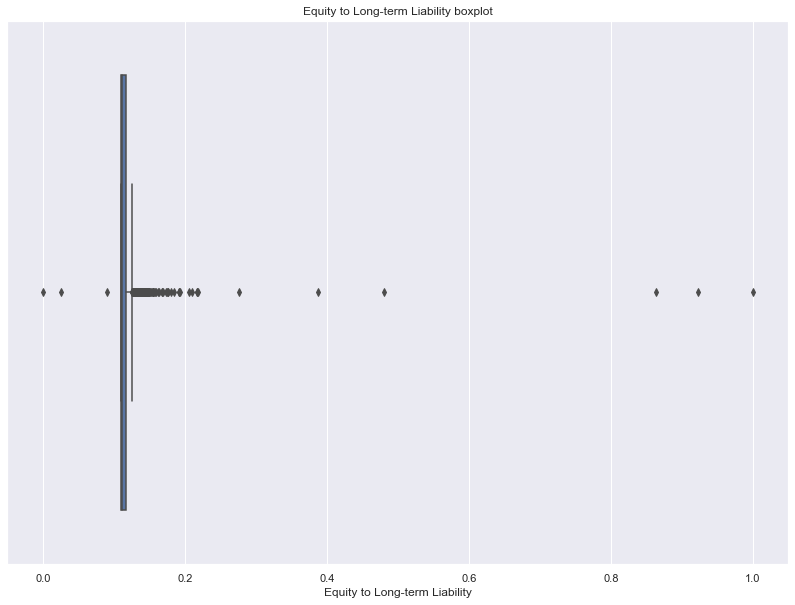

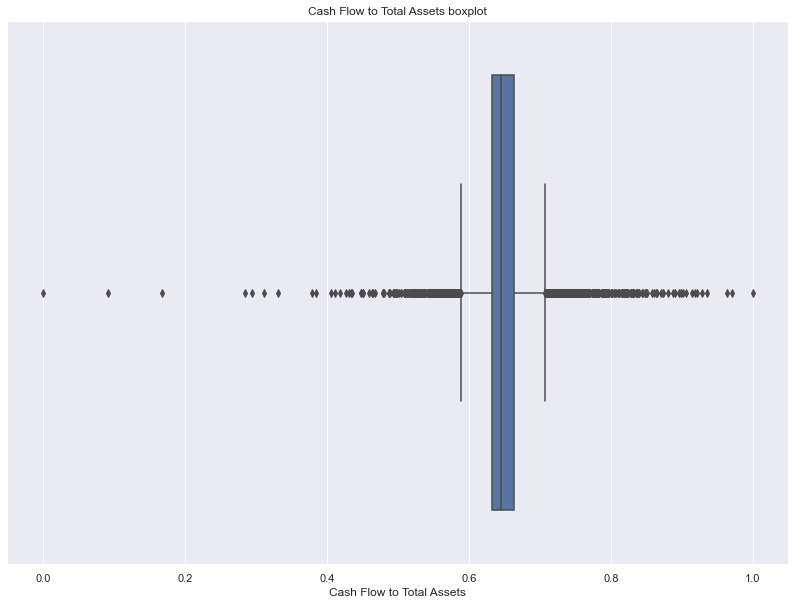

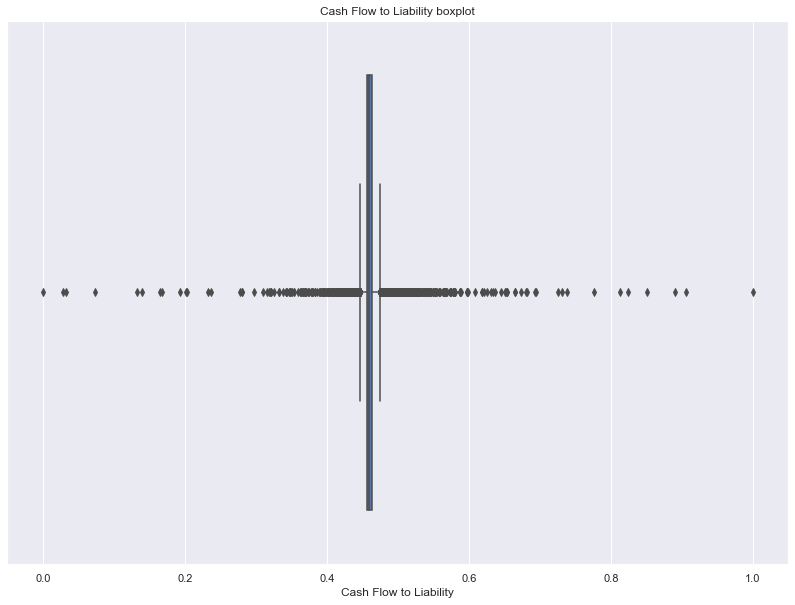

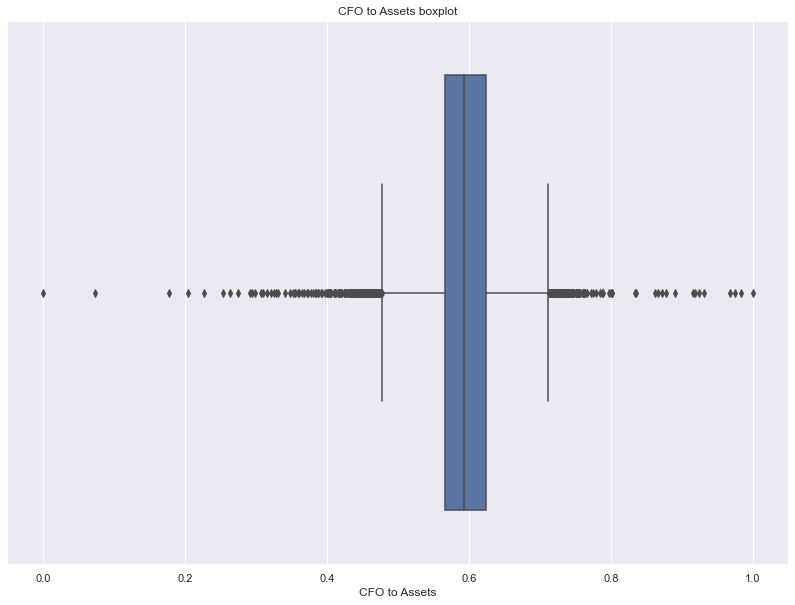

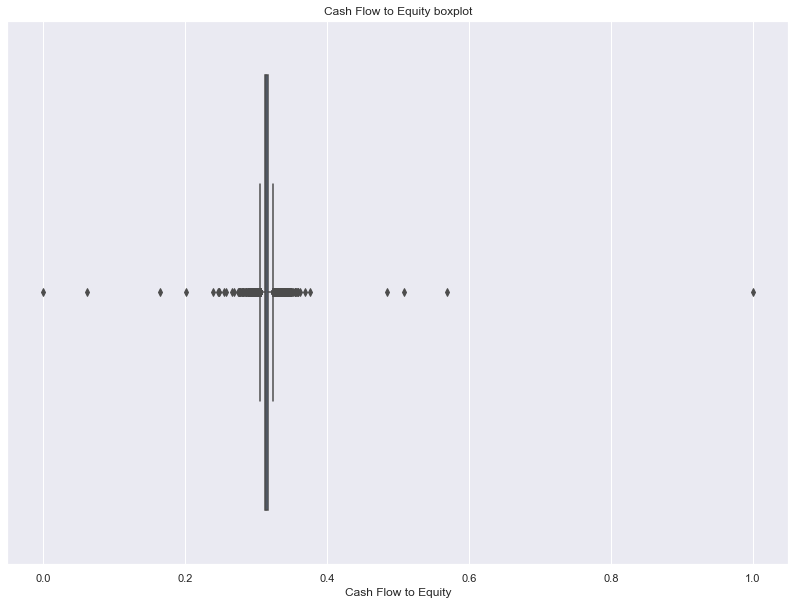

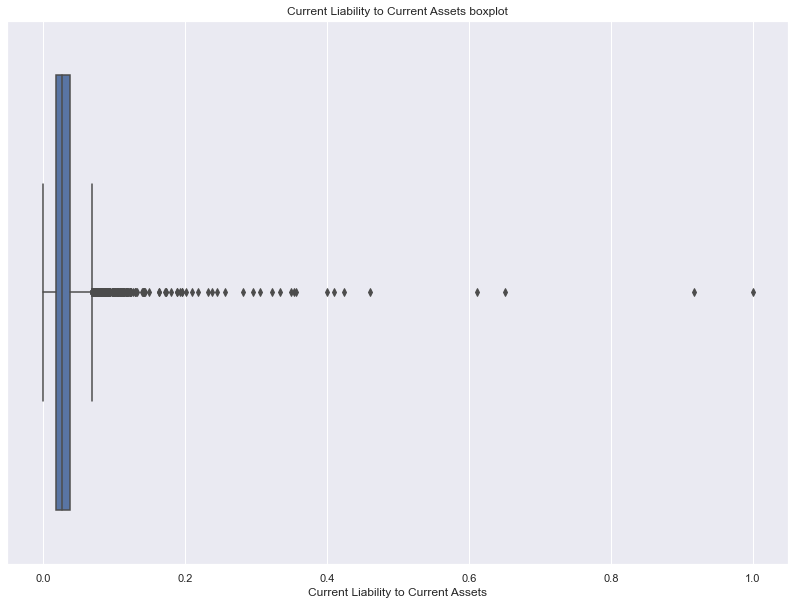

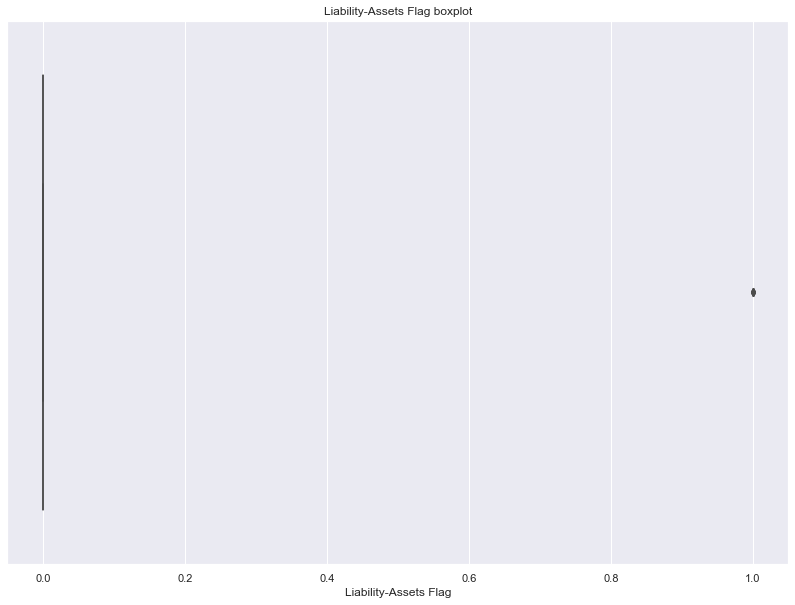

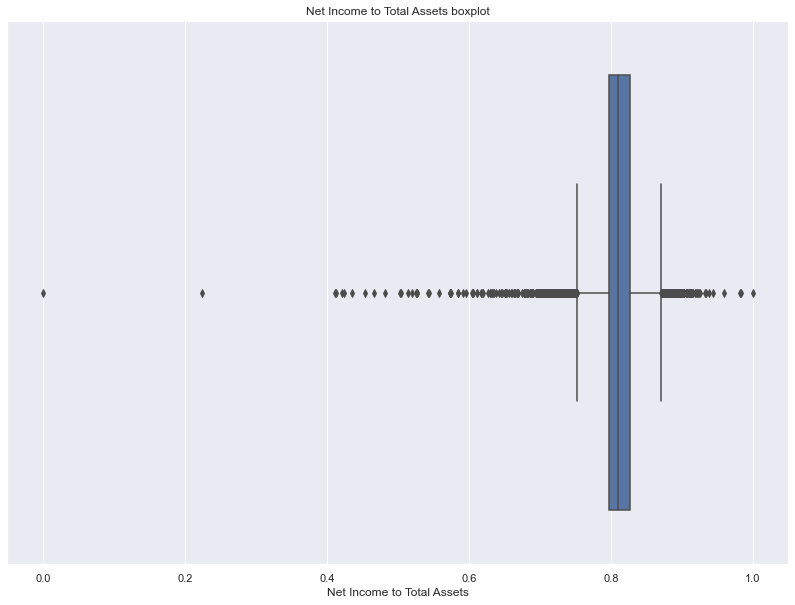

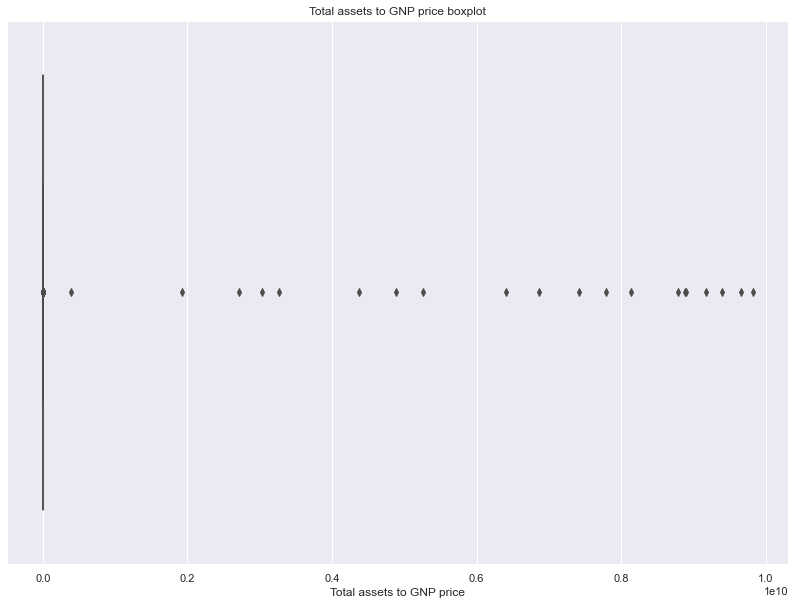

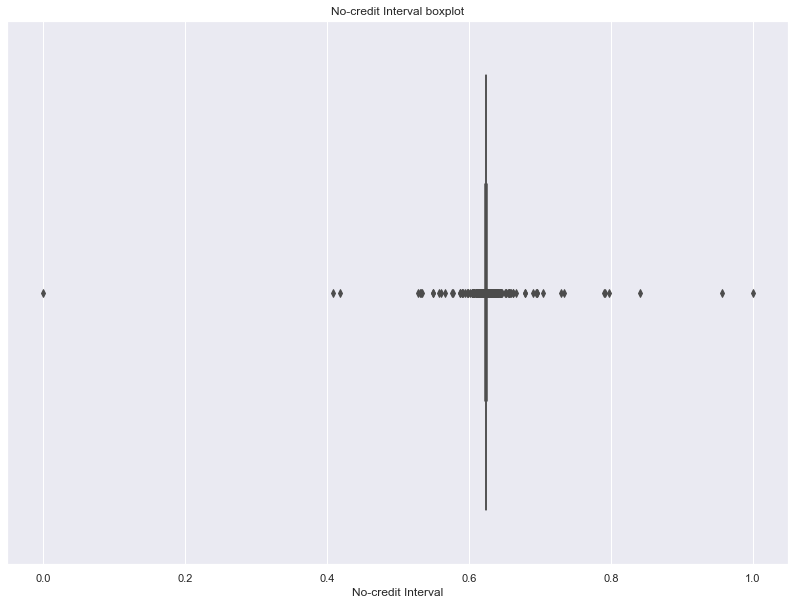

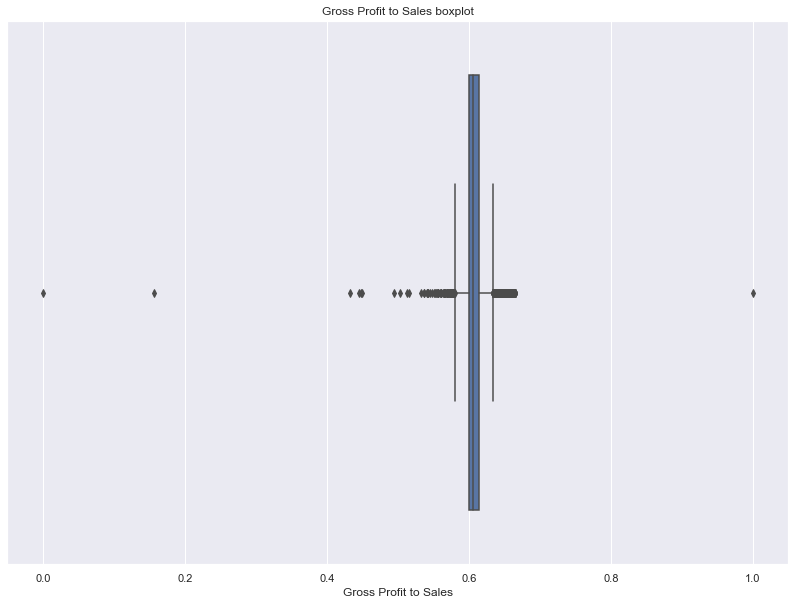

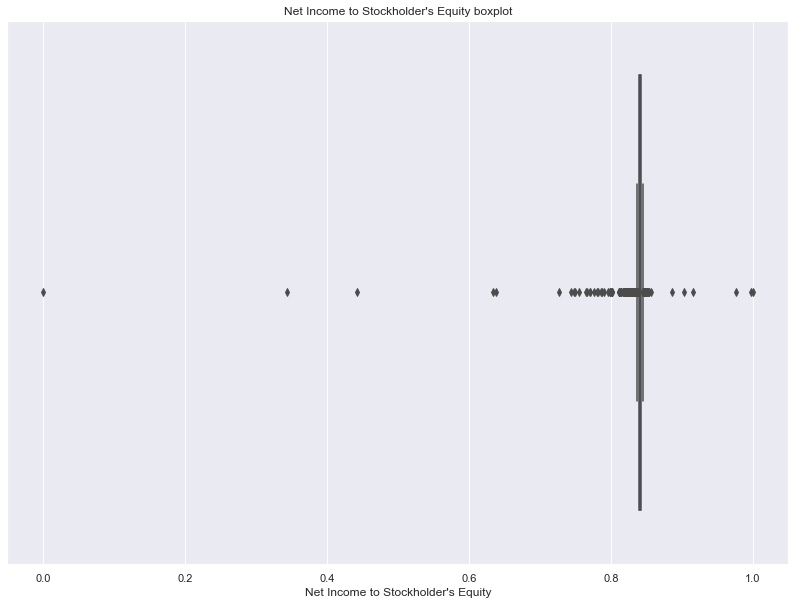

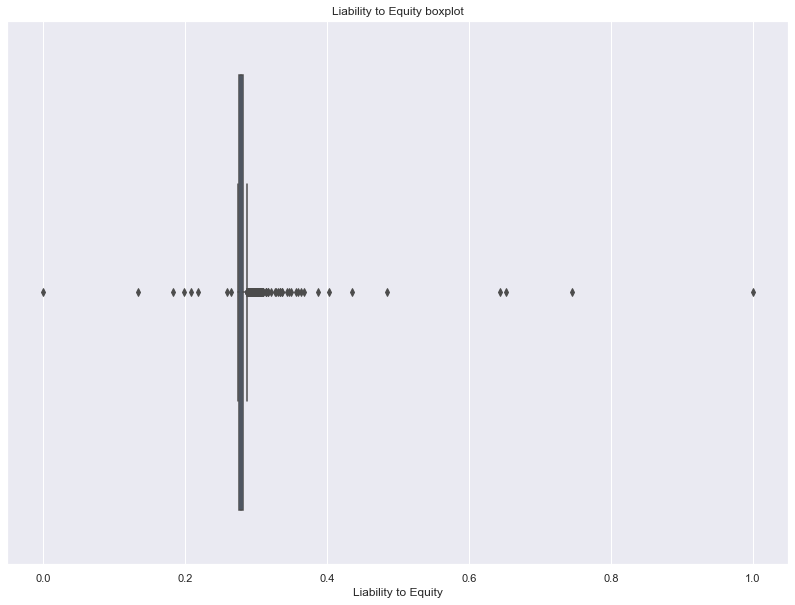

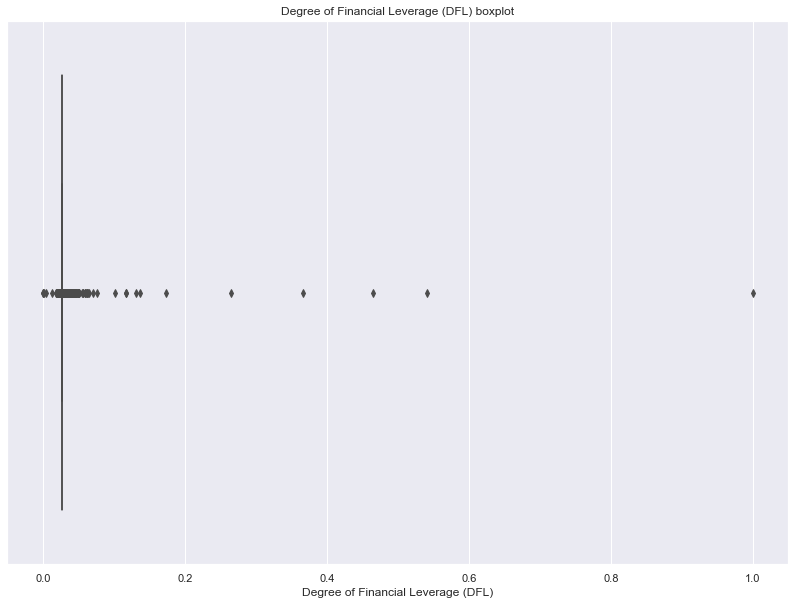

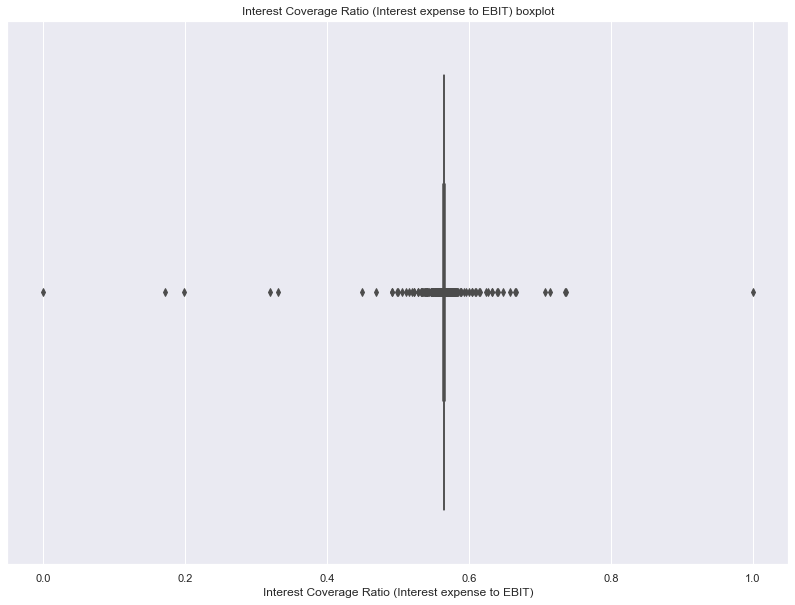

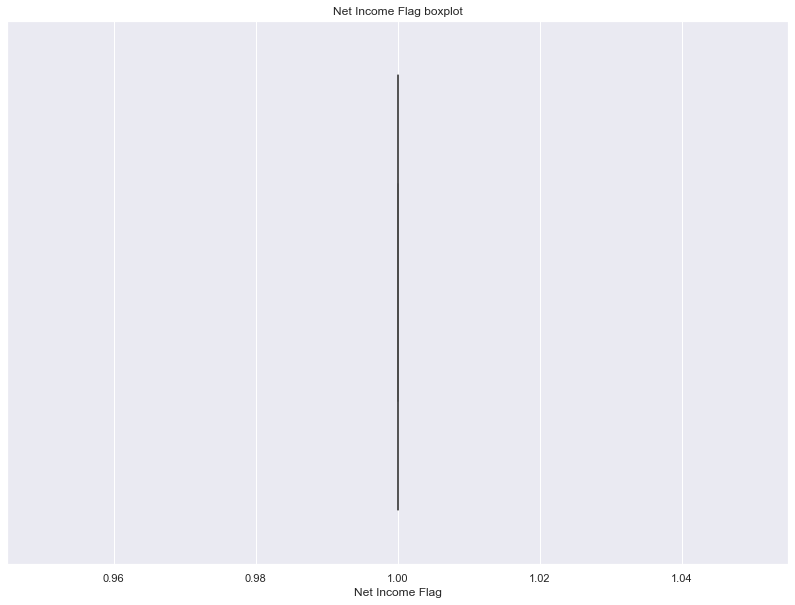

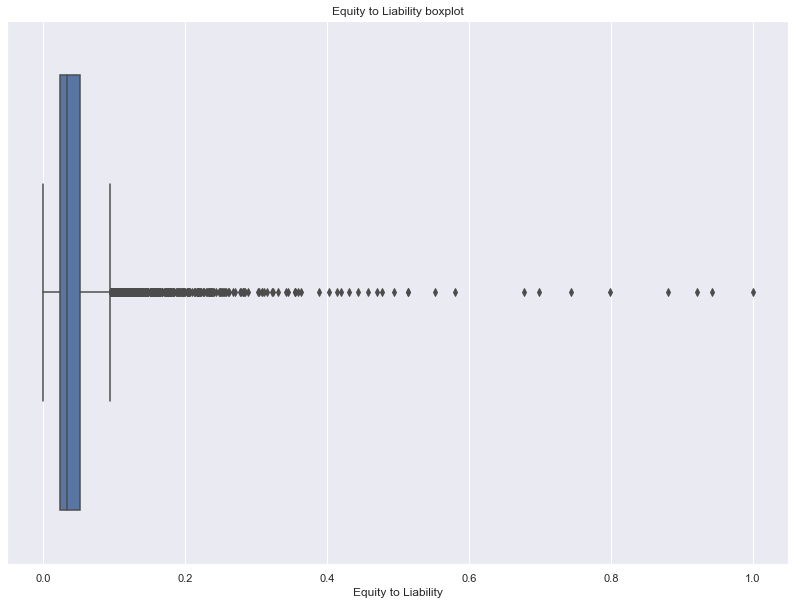

In [15]:
# boxplots of the attributes to see the distribution and outliers

for i, col in enumerate(df.columns[1:]):
    plt.figure(i)
    plt.title(col+" boxplot")
    sns.boxplot(x=df[col])

### 1.3. Outliers


From the boxplots above, we can see outliers in almost every attribute.

## 2. Preprocessing

### 2.1. Train/test split
We will do the split 70/30, but we will maintain the target variable balanced across the train and test split.

In [58]:
# split into train/test
split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df['Bankrupt?']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
X_train = strat_train_set.drop('Bankrupt?', axis=1)
y_train = strat_train_set['Bankrupt?']
X_test = strat_test_set.drop('Bankrupt?', axis=1)
y_test = strat_test_set['Bankrupt?']

### 2.2. Clean missing values
There are no missing values.

### 2.3. Remove outliers
We will try to remove the outliers with RobustScaler, and then we will also see how PCA affects  the quality of the model.

### 2.4. Scaling
We will try multiple scalers like StandardScaler, MinMaxScaler and RobustScaler.  
Standard Scaler scales the data according to the normal distribution with mean 0.  
MinMaxScaler scales the data in the range of 0,1 or -1,1 depending on the data.  
And RobustScaler removes the outliers by only choosing the data in the interquantile range.

### 2.5. Encoding
We do not have any variables that need encoding in this data set. We only have the target variable as true/false, but that is already in a binary format so we do not need to convert it to 1/0.

### 2.6. PCA

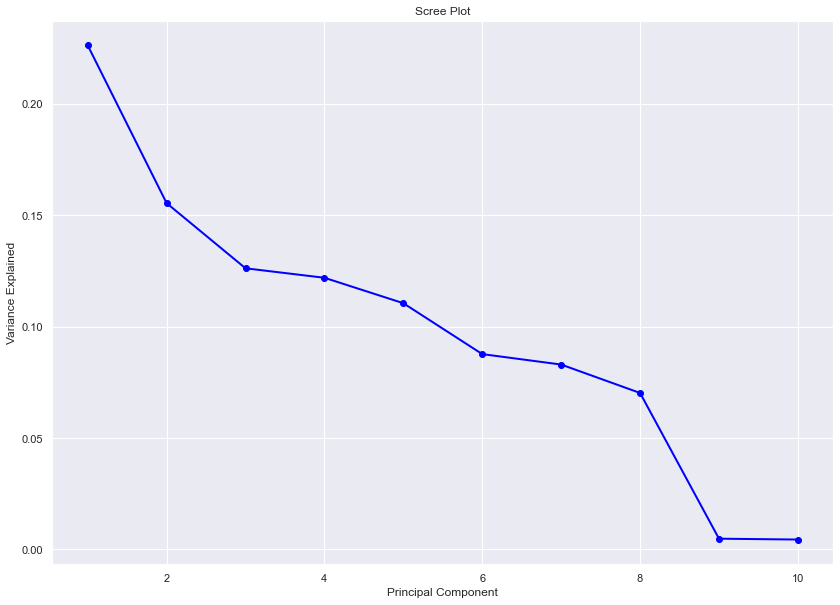

In [25]:
n_comp = 10

pca = PCA(n_components=n_comp)

pca.fit(X_train)

pc_values = np.arange(pca.n_components_) + 1

plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## 3. Model development

### 3.1. K-nearest neighbors

In [26]:
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

knn_search = RandomizedSearchCV(knn, knn_params, n_iter=7, scoring='accuracy', n_jobs=-1, cv=5)
knn_result = knn_search.fit(X_train, y_train)

In [27]:
print('Best Score: %s' % knn_result.best_score_)
print('Best Hyperparameters: %s' % knn_result.best_params_)

Best Score: 0.9677353002513529
Best Hyperparameters: {'n_neighbors': 13}


In [29]:
y_pred = knn_search.predict(X_test)

print("Accurracy: ", accuracy_score(y_test, y_pred))

Accurracy:  0.967741935483871


### 3.2. Random forest

In [31]:
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [100, 125, 150, 175, 200, 250, 300]
}

rf_search = RandomizedSearchCV(rf, rf_params, n_iter=7, scoring='accuracy', n_jobs=-1, cv=5)
rf_result = rf_search.fit(X_train, y_train)

In [32]:
print('Best Score: %s' % rf_result.best_score_)
print('Best Hyperparameters: %s' % rf_result.best_params_)

Best Score: 0.9710882808126708
Best Hyperparameters: {'n_estimators': 200}


In [34]:
y_pred = rf_search.predict(X_test)

print("Accurracy: ", accuracy_score(y_test, y_pred))

Accurracy:  0.9672531769305963


Text(0.5, 1.0, 'Importance of attributes in RF Classifier')

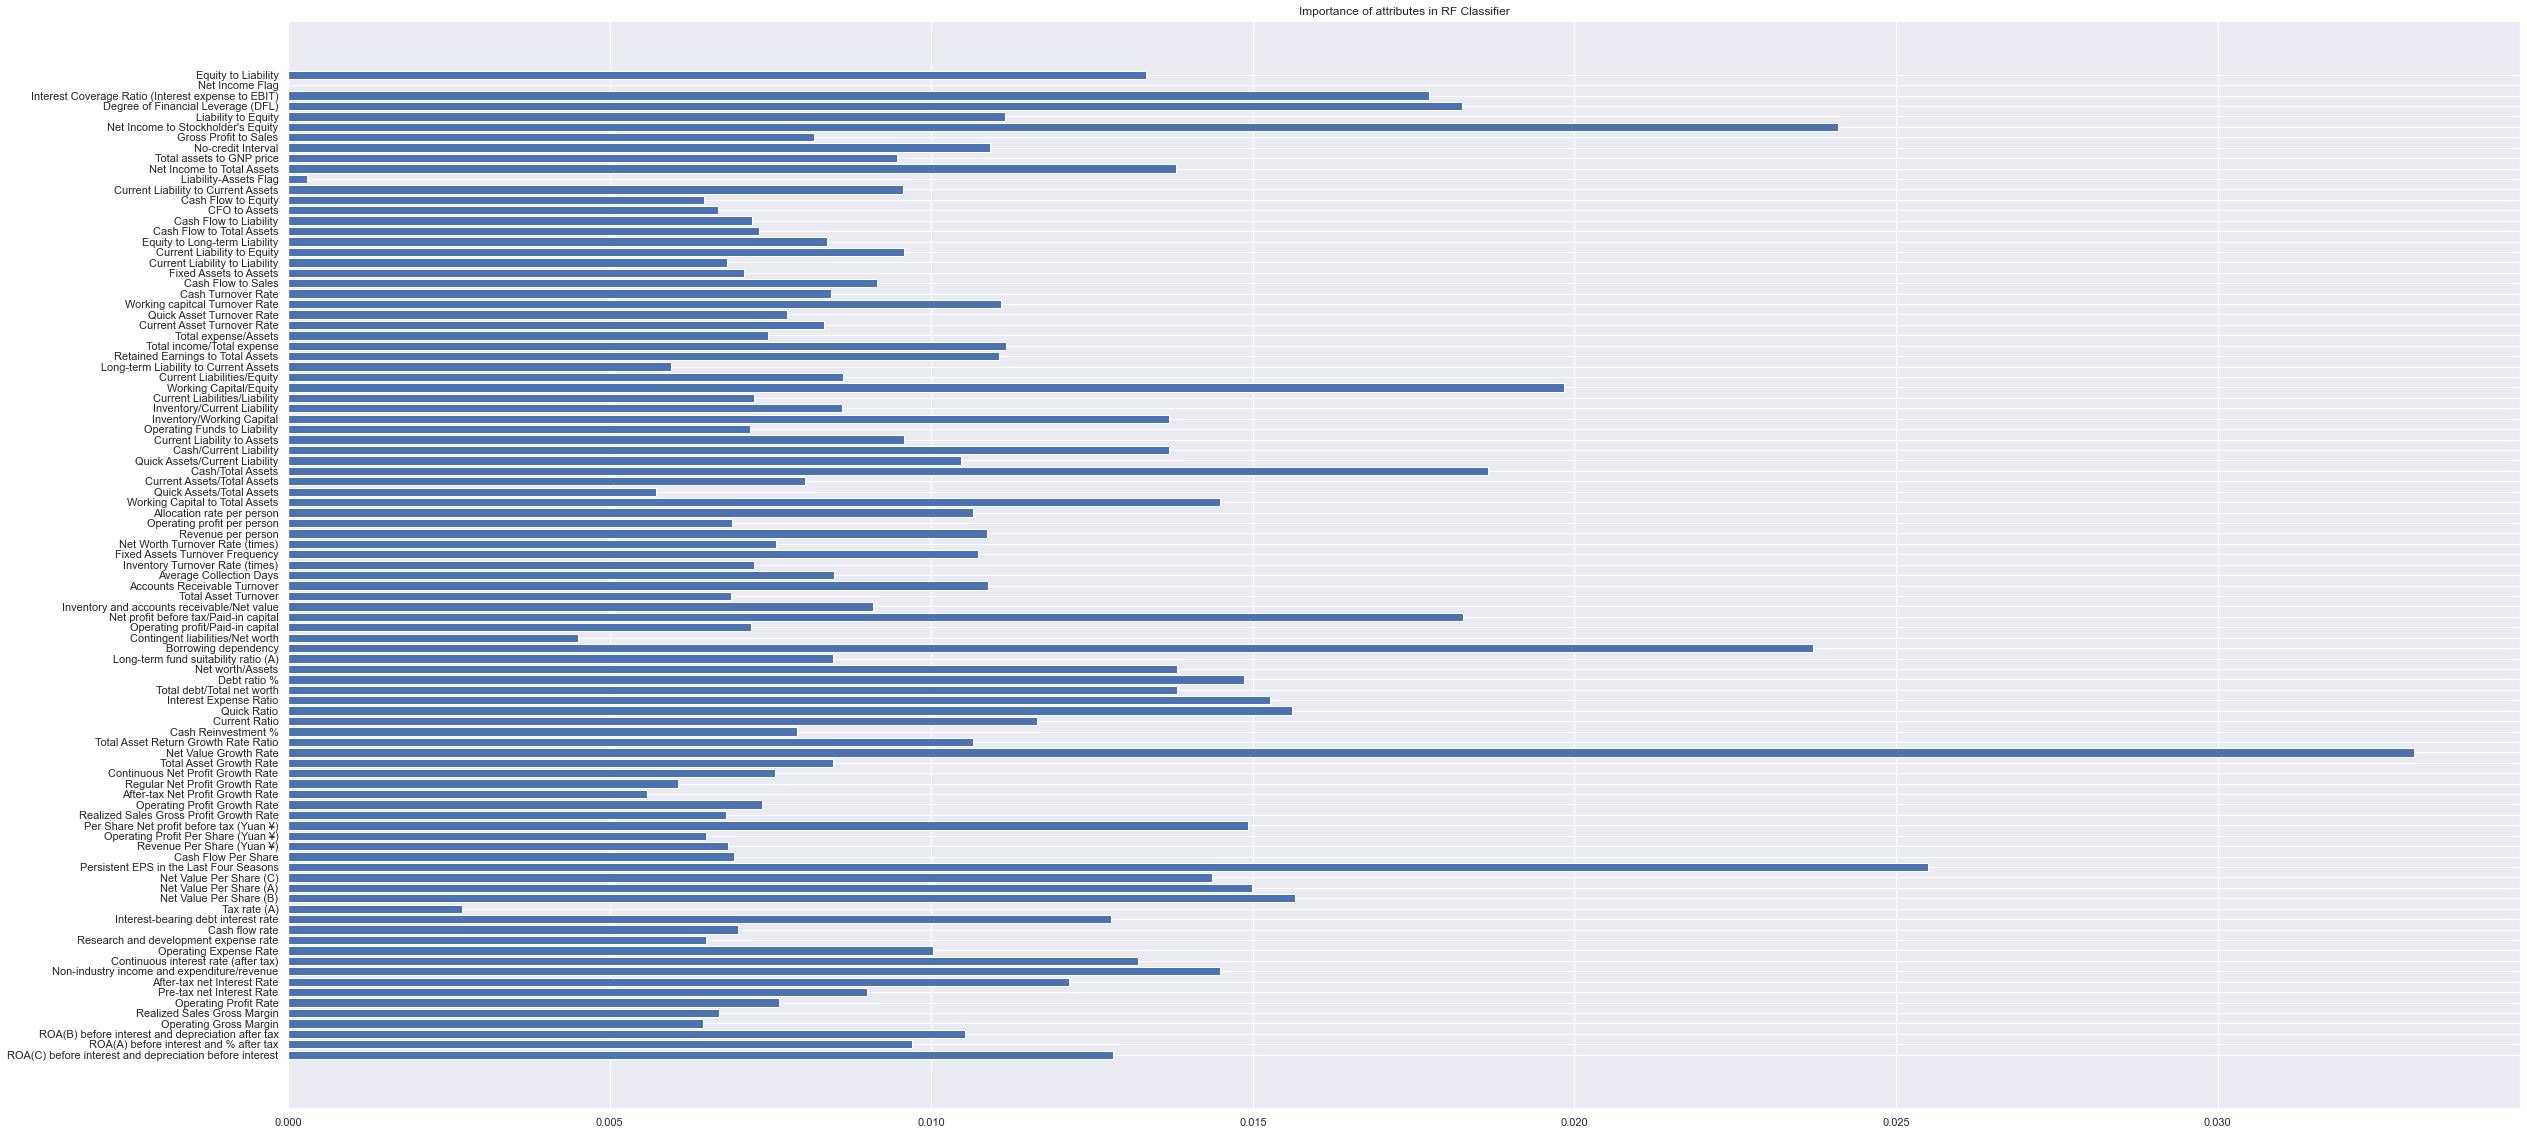

In [41]:
# creating the rf model, to plot the importance of attributes

model = RandomForestClassifier(n_estimators=200)

model.fit(X_train, y_train)

plt.barh(X_train.columns, model.feature_importances_)
plt.rcParams["figure.figsize"] = (60,30)
plt.title("Importance of attributes in RF Classifier")

### 3.3. Multiple Layer Perceptron

In [42]:
mlp = MLPClassifier()

mlp_params = {
    'hidden_layer_sizes': [(400, 200), (300, 150), (200, 100), (400), (300), (200), (100)],
    'alpha': [0.0001, 0.0002, 0.0003],
    'learning_rate_init': [0.001, 0.002, 0.003],
    'max_iter': [500],
    'activation' : ['relu', 'tanh', 'identity', 'logistic'],
    'solver': ['adam', 'lbfgs']
}

mlp_search = RandomizedSearchCV(mlp, mlp_params, n_iter=15, scoring='accuracy', n_jobs=-1, cv=5)
mlp_result = mlp_search.fit(X_train, y_train)

In [43]:
print('Best Score: %s' % mlp_result.best_score_)
print('Best Hyperparameters: %s' % mlp_result.best_params_)

Best Score: 0.9677353002513529
Best Hyperparameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': 200, 'alpha': 0.0002, 'activation': 'logistic'}


In [46]:
y_pred = mlp_search.predict(X_test)

print("Accurracy: ", accuracy_score(y_test, y_pred))

Accurracy:  0.967741935483871


## Model comparison

In [50]:
df.head()

Bankrupt?  ROA(C) before interest and depreciation before interest  ROA(A) before interest and % after tax  ROA(B) before interest and depreciation after tax  Operating Gross Margin  Realized Sales Gross Margin  Operating Profit Rate  Pre-tax net Interest Rate  After-tax net Interest Rate  Non-industry income and expenditure/revenue  Continuous interest rate (after tax)  Operating Expense Rate  Research and development expense rate  Cash flow rate  Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  Net Value Per Share (A)  Net Value Per Share (C)  Persistent EPS in the Last Four Seasons  Cash Flow Per Share  Revenue Per Share (Yuan ¥)  Operating Profit Per Share (Yuan ¥)  Per Share Net profit before tax (Yuan ¥)  Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  After-tax Net Profit Growth Rate  Regular Net Profit Growth Rate  Continuous Net Profit Growth Rate  Total Asset Growth Rate  Net Value Growth Rate  \
0          1                                           0.370594                                      0.424389                                           0.405750                0.601457                     0.601457               0.998969                   0.796887                     0.808809                                     0.302646                              0.780985            1.256969e-04                                    0.0        0.458143                             0.000725           0.0                 0.147950                 0.147950                 0.147950                                 0.169141             0.311664                    0.017560                             0.095921                                  0.138736                                 0.022102                      0.848195                          0.688979                        0.688979                           0.217535             4.980000e+09               0.000327   
1          1                                           0.464291                                      0.538214                                           0.516730                0.610235                     0.610235               0.998946                   0.797380                     0.809301                                     0.303556                              0.781506            2.897851e-04                                    0.0        0.461867                             0.000647           0.0                 0.182251                 0.182251                 0.182251                                 0.208944             0.318137                    0.021144                             0.093722                                  0.169918                                 0.022080                      0.848088                          0.689693                        0.689702                           0.217620             6.110000e+09               0.000443   
2          1                                           0.426071                                      0.499019                                           0.472295                0.601450                     0.601364               0.998857                   0.796403                     0.808388                                     0.302035                              0.780284            2.361297e-04                             25500000.0        0.458521                             0.000790           0.0                 0.177911                 0.177911                 0.193713                                 0.180581             0.307102                    0.005944                             0.092338                                  0.142803                                 0.022760                      0.848094                          0.689463                        0.689470                           0.217601             7.280000e+09               0.000396   
3          1                                           0.399844                                      0.451265  

In [71]:
cols = ["algorithm", "scaler", "val", "accuracy", "precision", "recall", "f1", "elapsed_time (sec)"]
results = pd.DataFrame(columns = cols)

classifiers = [
    KNeighborsClassifier(n_neighbors=13),
    RandomForestClassifier(n_estimators=200),
    MLPClassifier(hidden_layer_sizes=(200),
                  solver='adam',
                  activation='logistic',
                  alpha=0.0002,
                  max_iter=500,
                  learning_rate_init=0.001)
]

scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    PCA(n_components=8),
    PCA(n_components=10),
    None
]

validation = ['cv', 'holdout']

for classifier in classifiers:
    for scaler in scalers:
        for validation_method in validation:
            steps = [
                ('scaler', scaler),
                ('clf', classifier)
            ]
            
            pipeline = Pipeline(steps)
            algorithm = classifier
            
            if validation_method == 'holdout':
                split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
                for train_index, test_index in split.split(df, df['Bankrupt?']):
                    strat_train_set = df.loc[train_index]
                    strat_test_set = df.loc[test_index]
    
                X_train = strat_train_set.drop('Bankrupt?', axis=1)
                y_train = strat_train_set['Bankrupt?']
                X_test = strat_test_set.drop('Bankrupt?', axis=1)
                y_test = strat_test_set['Bankrupt?']
                
                # --------------------------------
                st = time.time()
                # ------------
                pipeline.fit(X_train, y_train)   
                # ------------
                et = time.time()
                # --------------------------------

                y_pred = pipeline.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
                recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
                f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
                elapsed_time = et - st

                new_row = pd.DataFrame({
                    "algorithm": str(algorithm),
                    "scaler": str(scaler),
                    "val": 'holdout',
                    "accuracy": accuracy,
                    "precision":precision,
                    "recall":recall,
                    "f1": f1,
                    "elapsed_time (sec)": elapsed_time}, index=[0])

                results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)
                
            elif validation_method == 'cv':
                
                X = df.drop(columns=['Bankrupt?'])
                y = df['Bankrupt?']
                
                # --------------------------------
                st = time.time()
                # ------------
                accuracy_scores = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
                # ------------
                et = time.time()
                # --------------------------------
                
                elapsed_time = et - st
                
                precision_scores = cross_val_score(pipeline, X, y, cv=5, scoring="precision")
                recall_scores = cross_val_score(pipeline, X, y, cv=5, scoring="recall")
                f1_scores = cross_val_score(pipeline, X, y, cv=5, scoring="f1")
                
                new_row = pd.DataFrame({
                    "algorithm": str(algorithm),
                    "scaler": str(scaler),
                    "val": 'cv',
                    "accuracy": accuracy_scores.mean(),
                    "precision":precision_scores.mean(),
                    "recall":recall_scores.mean(),
                    "f1": f1_scores.mean(),
                    "elapsed_time (sec)": elapsed_time}, index=[0])
                
                results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

In [72]:
results.sort_values(by="accuracy", ascending=False)

algorithm                scaler      val  accuracy  precision    recall        f1  elapsed_time (sec)
20           RandomForestClassifier(n_estimators=200)        MinMaxScaler()  holdout  0.970674   0.795316  0.618687  0.666413            5.002205
12           RandomForestClassifier(n_estimators=200)                  None  holdout  0.969208   0.772381  0.588636  0.630066            6.332053
18           RandomForestClassifier(n_estimators=200)        RobustScaler()  holdout  0.968231   0.746888  0.595455  0.634734            5.529195
30               KNeighborsClassifier(n_neighbors=13)        RobustScaler()  holdout  0.968231   0.817670  0.514899  0.520907            0.043239
22           RandomForestClassifier(n_estimators=200)      StandardScaler()  holdout  0.968231   0.748325  0.580808  0.618322            4.625620
35               KNeighborsClassifier(n_neighbors=13)      StandardScaler()       cv  0.967884   0.484762  0.095455  0.155428            1.397158
0   MLPClassifier(activation='logistic', alpha=0.0...                  None  holdout  0.967742   0.483871  0.500000  0.491803            4.281041
2   MLPClassifier(activation='logistic', alpha=0.0...  PCA(n_components=10)  holdout  0.967742   0.483871  0.500000  0.491803            3.765132
26               KNeighborsClassifier(n_neighbors=13)  PCA(n_components=10)  holdout  0.967742   0.483871  0.500000  0.491803            0.048921
4   MLPClassifier(activation='logistic', alpha=0.0...   PCA(n_components=8)  holdout  0.967742   0.483871  0.500000  0.491803            3.137408
28               KNeighborsClassifier(n_neighbors=13)   PCA(n_components=8)  holdout  0.967742   0.483871  0.500000  0.491803            0.073988
24               KNeighborsClassifier(n_neighbors=13)                  None  holdout  0.967742   0.483871  0.500000  0.491803            0.005004
5   MLPClassifier(activation='logistic', alpha=0.0...   PCA(n_components=8)       cv  0.967737   0.000000  0.000000  0.000000           32.123922
29               KNeighborsClassifier(n_neighbors=13)   PCA(n_components=8)       cv  0.967737   0.000000  0.000000  0.000000            0.706440
1   MLPClassifier(activation='logistic', alpha=0.0...                  None       cv  0.967737   0.000000  0.000000  0.000000           27.952291
27               KNeighborsClassifier(n_neighbors=13)  PCA(n_components=10)       cv  0.967737   0.000000  0.000000  0.000000            0.895686
3   MLPClassifier(activation='logistic', alpha=0.0...  PCA(n_components=10)       cv  0.967737   0.000000  0.000000  0.000000           18.637738
17           RandomForestClassifier(n_estimators=200)   PCA(n_components=8)       cv  0.967591   0.000000  0.000000  0.000000           10.380363
7   MLPClassifier(activation='logistic', alpha=0.0...        RobustScaler()       cv  0.967591   0.350000  0.018182  0.041581           62.879695
15           RandomForestClassifier(n_estimators=200)  PCA(n_components=10)       cv  0.967591   0.200000  0.004545  0.000000           15.240339
25               KNeighborsClassifier(n_neighbors=13)                  None       cv  0.967444   0.000000  0.000000  0.000000            1.337347
32               KNeighborsClassifier(n_neighbors=13)        MinMaxScaler()  holdout  0.967253   0.483863  0.499747  0.491677            0.014149
34               KNeighborsClassifier(n_neighbors=13)      StandardScaler()  holdout  0.967253   0.712285  0.536364  0.556591            0.018184
31               KNeighborsClassifier(n_neighbors=13)        RobustScaler()       cv  0.967004   0.233333  0.013636  0.025391            1.433652
33               KNeighborsClassifier(n_neighbors=13)        MinMaxScaler()       cv  0.966857   0.200000  0.009091  0.017391            1.346383
6   MLPClassifier(activation='logistic', alpha=0.0...        RobustScaler()  holdout  0.966764   0.672044  0.521465  0.532079            8.173543
8   MLPClassifier(activation='logistic', alpha=0.0...        MinMaxScaler()  holdout  0.966764   0.717

## 4. Results discussion

The algorithm that performed the best on this data set was the Random Forest Classifier with an accuracy of 97%. The other algorithms came in close second, but it didn't matter what kind of scaler occured before the RFClassifier, it still managed to provide very good results. There are no visible differences between the effectiveness of scalers in this task.